<a href="https://colab.research.google.com/github/Vasyl808/deepfake_video_detection/blob/main/fakeavceleb(train_test_split)_balanced_ready.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kaggle

In [3]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"vasylhunia","key":"ac16ba802a4f035043401d0f06d03422"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!pip install facenet_pytorch --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.8 MB/s eta 0:00:00


In [5]:
from kaggle.api.kaggle_api_extended import KaggleApi


api = KaggleApi()
api.authenticate()
api.dataset_download_files('kangjiayong/deepfake-detection', path='./data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/kangjiayong/deepfake-detection


In [6]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/data/selected_video.csv')

df

,label,file_name,path
0,FAKE,qudhlvaxtc.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1,FAKE,jzxzzmcplq.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
2,FAKE,pydbvfkslp.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
3,FAKE,vytklfqusv.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
4,FAKE,dbzpqxlahq.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
...,...,...,...
5019,REAL,znlzegqkbp.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
5020,REAL,rzytdiivhu.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
5021,REAL,icffpvvtnu.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
5022,REAL,ucidfsqdkw.mp4,D:\OneDrive - Asia Pacific University\Degree Y...


In [7]:
len(df['file_name'].unique())

5024

In [8]:
import json
import os


def conver_path(path: str):
    if '00' in path:
        path = path.replace('00', '0')
        return path
    if '01' in path:
        path = path.replace('01', '1')
        return path
    if '02' in path:
        path = path.replace('02', '2')
        return path
    if '03' in path:
        path = path.replace('03', '3')
        return path
    if '04' in path:
        path = path.replace('04', '4')
        return path
    if '05' in path:
        path = path.replace('05', '5')
        return path
    if '06' in path:
        path = path.replace('06', '6')
        return path
    if '07' in path:
        path = path.replace('07', '7')
        return path
    if '08' in path:
        path = path.replace('08', '8')
        return path
    if '09' in path:
        path = path.replace('09', '9')
        return path


result = []
for _, row in df.iterrows():
    file_name = row['path']
    path_parts = []
    start = 0
    separator = '\\'

    for i, char in enumerate(file_name):
        if char == separator:
            path_parts.append(file_name[start:i])
            start = i + 1
    path_parts.append(file_name[start:])
    curr_path = path_parts[-1].replace('.zip', '')
    file_path = os.path.join('/content/data', row['label'], row['label'], conver_path(curr_path), row['file_name'])
    result.append((file_path, row['label']))

result

[('/content/data/FAKE/FAKE/dfdc_train_part_9/qudhlvaxtc.mp4', 'FAKE'),
 ('/content/data/FAKE/FAKE/dfdc_train_part_4/jzxzzmcplq.mp4', 'FAKE'),
 ('/content/data/FAKE/FAKE/dfdc_train_part_1/pydbvfkslp.mp4', 'FAKE'),
 ('/content/data/FAKE/FAKE/dfdc_train_part_8/vytklfqusv.mp4', 'FAKE'),
 ('/content/data/FAKE/FAKE/dfdc_train_part_1/dbzpqxlahq.mp4', 'FAKE'),
 ('/content/data/FAKE/FAKE/dfdc_train_part_7/uqkdiusxtz.mp4', 'FAKE'),
 ('/content/data/FAKE/FAKE/dfdc_train_part_1/snphlfsrmr.mp4', 'FAKE'),
 ('/content/data/FAKE/FAKE/dfdc_train_part_4/ohofmyydou.mp4', 'FAKE'),
 ('/content/data/FAKE/FAKE/dfdc_train_part_6/mhodpmscfi.mp4', 'FAKE'),
 ('/content/data/FAKE/FAKE/dfdc_train_part_4/hfhgtkuaxr.mp4', 'FAKE'),
 ('/content/data/FAKE/FAKE/dfdc_train_part_9/njgymtktgd.mp4', 'FAKE'),
 ('/content/data/FAKE/FAKE/dfdc_train_part_1/sclvdumbkh.mp4', 'FAKE'),
 ('/content/data/FAKE/FAKE/dfdc_train_part_1/lnfcazoshs.mp4', 'FAKE'),
 ('/content/data/FAKE/FAKE/dfdc_train_part_4/pwduwistqx.mp4', 'FAKE'),
 ('/co

In [9]:
import pandas as pd

df = pd.DataFrame(result, columns=['video_path', 'label'])

# Перевірка отриманого DataFrame
print(len(df['video_path'].unique()))
print(len(df['label'].unique()))

5024
2


<Axes: >

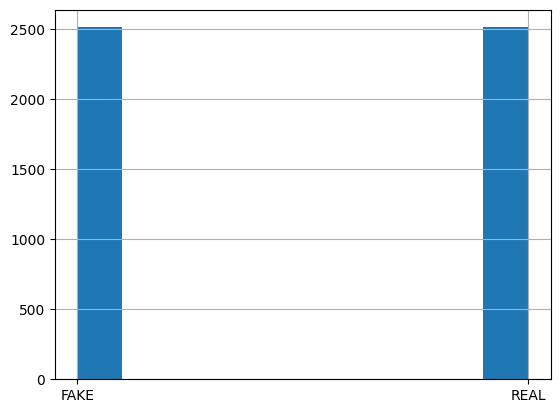

In [10]:
df['label'].hist()

In [11]:
from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(
    df,
    test_size=0.2,  # Наприклад, 20% для тестового набору
    stratify=df['label'],  # Зберігає співвідношення класів
    random_state=42  # Для відтворюваності
)

# Перевірка кількості кожного класу у тренувальному та тестовому наборах
print("Кількість у тренувальному наборі:")
print(train_data['label'].value_counts())
print("\nКількість у тестовому наборі:")
print(test_data['label'].value_counts())

Кількість у тренувальному наборі:
label
REAL    2010
FAKE    2009
Name: count, dtype: int64

Кількість у тестовому наборі:
label
FAKE    503
REAL    502
Name: count, dtype: int64


In [12]:
train_data

,video_path,label
1614,/content/data/FAKE/FAKE/dfdc_train_part_5/wogc...,FAKE
4968,/content/data/REAL/REAL/dfdc_train_part_9/veya...,REAL
4579,/content/data/REAL/REAL/dfdc_train_part_8/fapk...,REAL
4606,/content/data/REAL/REAL/dfdc_train_part_8/mvkn...,REAL
4887,/content/data/REAL/REAL/dfdc_train_part_9/hlte...,REAL
...,...,...
1135,/content/data/FAKE/FAKE/dfdc_train_part_6/kqyv...,FAKE
3556,/content/data/REAL/REAL/dfdc_train_part_5/imrp...,REAL
4819,/content/data/REAL/REAL/dfdc_train_part_9/gtxp...,REAL
2163,/content/data/FAKE/FAKE/dfdc_train_part_6/tfup...,FAKE


In [13]:
train_data.to_csv("train_dataset.csv", index=False)
test_data.to_csv("test_dataset.csv", index=False)

In [14]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('train_dataset.csv')


result = {}
for _, row in df.iterrows():

    file_path = row['video_path']

    label = row['label']


    result[file_path] = {
        'label': label
    }


with open('output_balenced_train.json', 'w') as json_file:
    json.dump(result, json_file)

In [15]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('test_dataset.csv')


result = {}
for _, row in df.iterrows():

    file_path = row['video_path']

    label = row['label']


    result[file_path] = {
        'label': label
    }

with open('output_balenced_test.json', 'w') as json_file:
    json.dump(result, json_file)

In [16]:
import json
from collections import Counter

# Зчитування JSON файлу
with open('output_balenced_train.json', 'r') as json_file:
    data = json.load(json_file)

# Ініціалізація лічильника для підрахунку лейблів
label_counts = Counter()

# Підрахунок кожного лейбла
for item in data.values():
    label_counts[item['label']] += 1

# Вивід розподілу лейблів
for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")


Label: FAKE, Count: 2009
Label: REAL, Count: 2010


In [17]:
import cv2
import itertools
import json
import numpy as np
import pandas as pd
import random
from torch.nn import functional as F
import os.path
import time
import torch
from torch import nn
from torch.nn import functional
import glob
import datetime
import subprocess
from facenet_pytorch import MTCNN
import shutil
import matplotlib.pyplot as plt
from pathlib import Path


class FaceDeepfakeDataset(torch.utils.data.Dataset):
    def __init__(self, folders, n_frames=None, n_audio_reads=50027, train=True, device=None, cache_folder=None):
        self.n_frames = n_frames
        self.videos = []
        self.train = train
        self.device = device if device is not None else torch.device("cpu")
        self.cache_folder = cache_folder
        self.detector = MTCNN(device=device, post_process=False)

        # Load video paths
        for i in range(len(folders)):
            if train:
                with open('/content/output_balenced_train.json') as f:
                    videos = json.load(f)
                    videos = [(video, metadata) for (video, metadata) in videos.items()]
                    self.videos += videos
            else:
                self.videos += glob.glob(folders[i] + "/*.mp4")

        if self.cache_folder:
            os.makedirs(self.cache_folder, exist_ok=True)

    def __process_frame(self, frame, video_id, frame_idx):
        cache_path = os.path.join(self.cache_folder, f"{video_id}_frame{frame_idx}.pt") if self.cache_folder else None

        # Якщо файл з кешем існує, завантажуємо його
        if cache_path and os.path.exists(cache_path):
            return torch.load(cache_path)

        # Інакше обробляємо кадр
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        boxes, _ = self.detector.detect(frame, landmarks=False)

        if boxes is None:
            return None
        else:
            box = boxes[0]
            width = box[2] - box[0]
            height = box[3] - box[1]
            expand_x = width * 0.3 / 2
            expand_y = height * 0.3 / 2
            x1 = max(int(box[0] - expand_x), 0)
            y1 = max(int(box[1] - expand_y), 0)
            x2 = min(int(box[2] + expand_x), frame.shape[1])
            y2 = min(int(box[3] + expand_y), frame.shape[0])

            face = frame[y1:y2, x1:x2]
            face = cv2.resize(face, (224, 224))
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0

            # Зберігаємо оброблений кадр у кеш
            if cache_path:
                torch.save(face, cache_path)

            return face

    def __getitem__(self, n):
        if self.train:
            video, metadata = self.videos[n]
        else:
            video = self.videos[n]

        video_id = os.path.splitext(os.path.basename(video))[0]
        cap = cv2.VideoCapture(video)

        frames = []
        frame_idx = 0
        while len(frames) < self.n_frames:
            ret, frame = cap.read()
            if not ret:
                break

            processed_frame = self.__process_frame(frame, video_id, frame_idx)
            if processed_frame is not None:
                frames.append(processed_frame)
            frame_idx += 1

        cap.release()
        frames = torch.stack(frames).to(self.device)

        if self.train:
            label = 0.0
            if metadata['label'] == 'FAKE':
                label = 1.0
            return frames, torch.FloatTensor([label]).to(self.device)
        else:
            return frames

    def __len__(self):
        return len(self.videos)

/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

Label: tensor([1.], device='cuda:0')


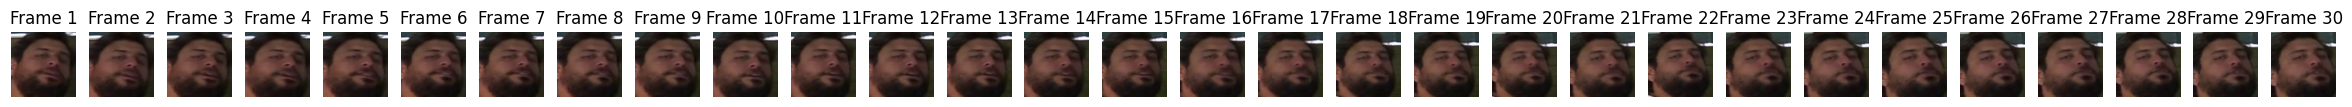

In [18]:
def test_face_dataset():
    TRAIN_FOLDERS = ['/content/dfdc/']
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    dataset = FaceDeepfakeDataset(TRAIN_FOLDERS, n_frames=30, train=True, device=device)

    # Одержуємо перший батч
    for i, batch in enumerate(dataset):
        frames, label = batch
        print(f"Label: {label}")

        # Перевіряємо розмір кадрів
        if frames.size() != torch.Size([30, 3, 224, 224]):
            print(f"Unexpected frame size: {frames.size()}")

        # Візуалізуємо перші два кадри
        fig, axes = plt.subplots(1, 30, figsize=(30, 10))

        for j in range(30):
            ax = axes[j]
            frame = frames[j].cpu().permute(1, 2, 0).numpy()  # Перетворюємо з CHW в HWC і конвертуємо в NumPy
            ax.imshow(frame)  # Виводимо зображення
            ax.set_title(f"Frame {j+1}")
            ax.axis('off')

        plt.show()
        break  # Призупиняємо після першого батчу

test_face_dataset()

In [19]:
class FaceDeepfakeDatasetTest(torch.utils.data.Dataset):
    def __init__(self, folders, n_frames=None, n_audio_reads=50027, train=True, device=None, cache_folder=None):
        self.n_frames = n_frames
        self.videos = []
        self.train = train
        self.device = device if device is not None else torch.device("cpu")
        self.cache_folder = cache_folder
        self.detector = MTCNN(device=device, post_process=False)

        # Load video paths
        for i in range(len(folders)):
            if train:
                with open('/content/output_balenced_test.json') as f:
                    videos = json.load(f)
                    videos = [(video, metadata) for (video, metadata) in videos.items()]
                    self.videos += videos
            else:
                self.videos += glob.glob(folders[i] + "/*.mp4")

        if self.cache_folder:
            os.makedirs(self.cache_folder, exist_ok=True)

    def __process_frame(self, frame, video_id, frame_idx):
        cache_path = os.path.join(self.cache_folder, f"{video_id}_frame{frame_idx}.pt") if self.cache_folder else None

        # Якщо файл з кешем існує, завантажуємо його
        if cache_path and os.path.exists(cache_path):
            return torch.load(cache_path)

        # Інакше обробляємо кадр
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        boxes, _ = self.detector.detect(frame, landmarks=False)

        if boxes is None:
            return None
        else:
            box = boxes[0]
            width = box[2] - box[0]
            height = box[3] - box[1]
            expand_x = width * 0.3 / 2
            expand_y = height * 0.3 / 2
            x1 = max(int(box[0] - expand_x), 0)
            y1 = max(int(box[1] - expand_y), 0)
            x2 = min(int(box[2] + expand_x), frame.shape[1])
            y2 = min(int(box[3] + expand_y), frame.shape[0])

            face = frame[y1:y2, x1:x2]
            face = cv2.resize(face, (224, 224))
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0

            # Зберігаємо оброблений кадр у кеш
            if cache_path:
                torch.save(face, cache_path)

            return face

    def __getitem__(self, n):
        if self.train:
            video, metadata = self.videos[n]
        else:
            video = self.videos[n]

        video_id = os.path.splitext(os.path.basename(video))[0]
        cap = cv2.VideoCapture(video)

        frames = []
        frame_idx = 0
        while len(frames) < self.n_frames:
            ret, frame = cap.read()
            if not ret:
                break

            processed_frame = self.__process_frame(frame, video_id, frame_idx)
            if processed_frame is not None:
                frames.append(processed_frame)
            frame_idx += 1

        cap.release()
        frames = torch.stack(frames).to(self.device)

        if self.train:
            label = 0.0
            if metadata['label'] == 'FAKE':
                label = 1.0
            return frames, torch.FloatTensor([label]).to(self.device)
        else:
            return frames

    def __len__(self):
        return len(self.videos)

Label: tensor([0.], device='cuda:0')


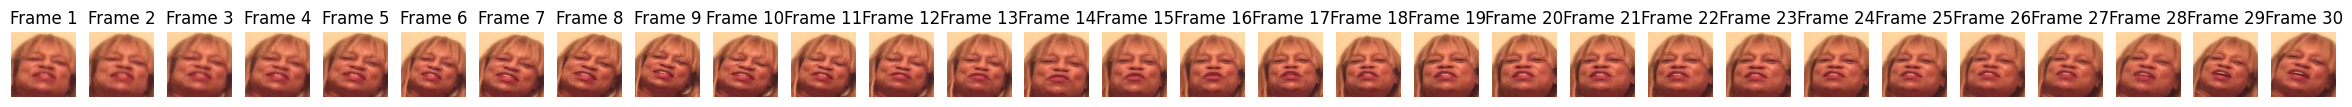

In [20]:
def test_face_dataset():
    TRAIN_FOLDERS = ['/content/test_videos']
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    dataset = FaceDeepfakeDatasetTest(TRAIN_FOLDERS, n_frames=30, train=True, device=device, cache_folder=None)

    # Одержуємо перший батч
    for i, batch in enumerate(dataset):
        frames, label = batch
        print(f"Label: {label}")

        # Перевіряємо розмір кадрів
        if frames.size() != torch.Size([30, 3, 224, 224]):
            print(f"Unexpected frame size: {frames.size()}")

        # Візуалізуємо перші два кадри
        fig, axes = plt.subplots(1, 30, figsize=(30, 10))

        for j in range(30):
            ax = axes[j]
            frame = frames[j].cpu().permute(1, 2, 0).numpy()  # Перетворюємо з CHW в HWC і конвертуємо в NumPy
            ax.imshow(frame)  # Виводимо зображення
            ax.set_title(f"Frame {j+1}")
            ax.axis('off')

        plt.show()
        break  # Призупиняємо після першого батчу

test_face_dataset()

In [21]:
import torch
import torch.nn as nn
import math
from torch.nn import functional as F
import torchvision.models as models


class FaceClassifier(nn.Module):
    def __init__(self, n_linear_hidden=256, lstm_hidden_dim=128, num_lstm_layers=1):
        super(FaceClassifier, self).__init__()

        # Завантаження попередньо натренованої EfficientNet
        self.cnn = models.efficientnet_b0(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(self.cnn.children())[:-1])  # Виключаємо шар класифікації

        for param in self.feature_extractor.parameters():
            param.requires_grad = False

        # Розмір виходу від feature extractor
        self.feature_output_size = 1280  # EfficientNet B7 дає 2560 ознак

        # LSTM для обробки послідовності ознак кожного кадру
        self.lstm = nn.LSTM(input_size=self.feature_output_size,
                            hidden_size=lstm_hidden_dim,
                            num_layers=num_lstm_layers,
                            batch_first=True,
                            bidirectional=True)

        # Повнозв'язні шари для класифікації
        self.fc1 = nn.Linear(2 * lstm_hidden_dim, n_linear_hidden)  # множимо на 2 через bidirectional LSTM
        self.fc2 = nn.Linear(n_linear_hidden, 1)

    def forward(self, vid_frames):
        # Витягання ознак для кожного кадру
        batch_size, num_frames, channels, height, width = vid_frames.shape
        vid_frames = vid_frames.view(batch_size * num_frames, channels, height, width)

        # Використовуємо фічерний екстрактор
        with torch.no_grad():
            vid_features = self.feature_extractor(vid_frames)

        # Переформатовуємо ознаки для LSTM
        vid_features = vid_features.view(batch_size, num_frames, -1)  # (batch_size, num_frames, feature_output_size)

        # Обробка послідовності кадрів через LSTM
        lstm_out, _ = self.lstm(vid_features)  # lstm_out: (batch_size, num_frames, 2 * lstm_hidden_dim)

        # Використання середнього значення по кадрам для об'єднання послідовності (можна також використовувати останній кадр або інші методи агрегації)
        lstm_out = torch.mean(lstm_out, dim=1)  # (batch_size, 2 * lstm_hidden_dim)

        # Класифікаційні шари
        x = torch.relu(self.fc1(lstm_out))
        x = self.fc2(x)

        return x

all train folders: ['/content/dfdc'], <class 'list'>
all test folders: ['/content/test_videos'], <class 'list'>


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 64.2MB/s]
/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False`

start time: 2024-11-10 14:44:48.109613
using device: cuda
503


503it [1:38:27, 11.74s/it]


[[1211  799]
 [ 579 1430]]


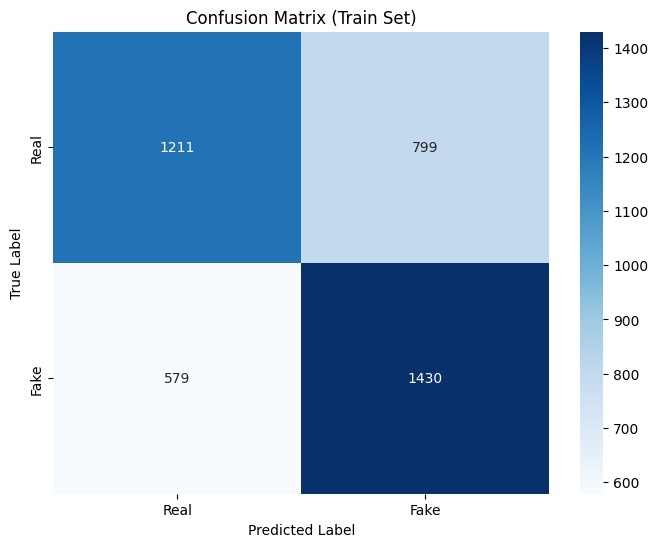

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.68      0.60      0.64      2010
        Fake       0.64      0.71      0.67      2009

    accuracy                           0.66      4019
   macro avg       0.66      0.66      0.66      4019
weighted avg       0.66      0.66      0.66      4019

..............................................................................................................................
epoch: 0, train loss: 0.615542831317805, val loss: 2.4572860647052055, executed in: 7213.539307117462
train total: 4019, train correct: 2641.0, train incorrect: 1378.0, train accuracy: 0.657128632068634
valid total: 1005, valid correct: 700.0, valid incorrect: 305.0, valid accuracy: 0.6965174674987793


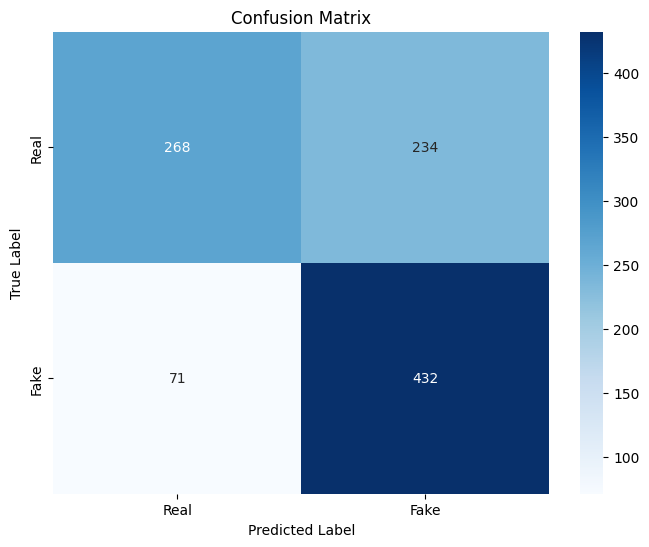

Classification Report:
              precision    recall  f1-score   support

        Real       0.79      0.53      0.64       502
        Fake       0.65      0.86      0.74       503

    accuracy                           0.70      1005
   macro avg       0.72      0.70      0.69      1005
weighted avg       0.72      0.70      0.69      1005



0it [00:00, ?it/s]<ipython-input-16-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [16:47,  2.00s/it]


[[1377  633]
 [ 535 1474]]


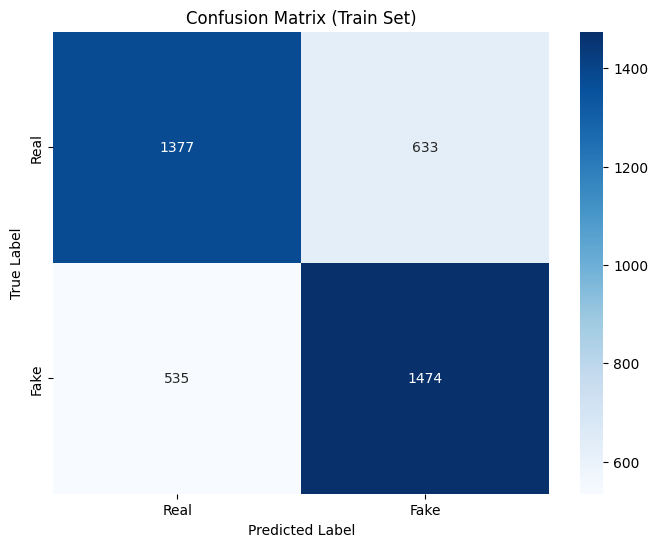

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.72      0.69      0.70      2010
        Fake       0.70      0.73      0.72      2009

    accuracy                           0.71      4019
   macro avg       0.71      0.71      0.71      4019
weighted avg       0.71      0.71      0.71      4019



<ipython-input-18-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 1, train loss: 0.5641638658511235, val loss: 2.252177972405676, executed in: 1261.3576426506042
train total: 4019, train correct: 2851.0, train incorrect: 1168.0, train accuracy: 0.7093804478645325
valid total: 1005, valid correct: 743.0, valid incorrect: 262.0, valid accuracy: 0.7393035292625427


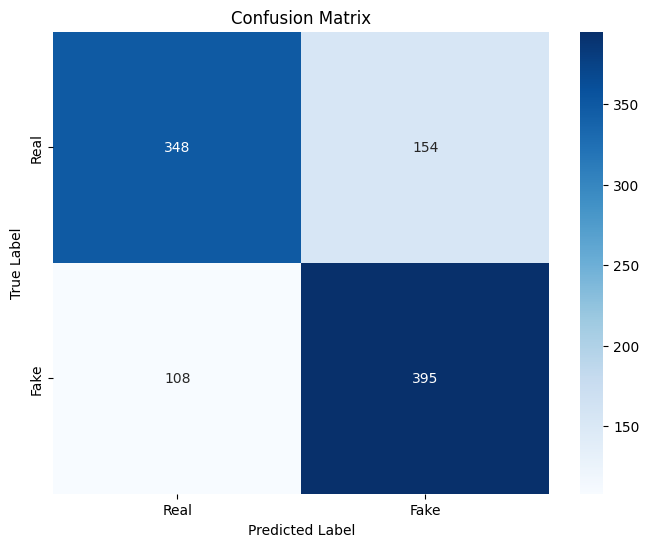

Classification Report:
              precision    recall  f1-score   support

        Real       0.76      0.69      0.73       502
        Fake       0.72      0.79      0.75       503

    accuracy                           0.74      1005
   macro avg       0.74      0.74      0.74      1005
weighted avg       0.74      0.74      0.74      1005



0it [00:00, ?it/s]<ipython-input-16-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [16:49,  2.01s/it]


[[1449  561]
 [ 519 1490]]


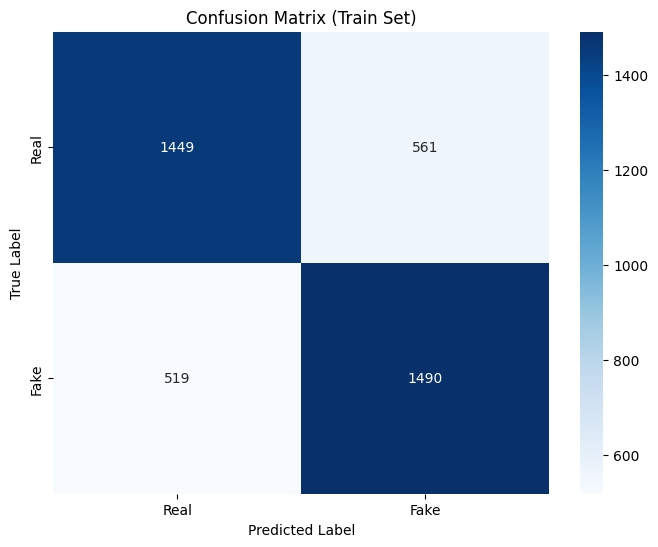

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.74      0.72      0.73      2010
        Fake       0.73      0.74      0.73      2009

    accuracy                           0.73      4019
   macro avg       0.73      0.73      0.73      4019
weighted avg       0.73      0.73      0.73      4019



<ipython-input-18-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 2, train loss: 0.5227728654032436, val loss: 2.0869424706177107, executed in: 1260.949372291565
train total: 4019, train correct: 2939.0, train incorrect: 1080.0, train accuracy: 0.7312763929367065
valid total: 1005, valid correct: 771.0, valid incorrect: 234.0, valid accuracy: 0.7671642303466797


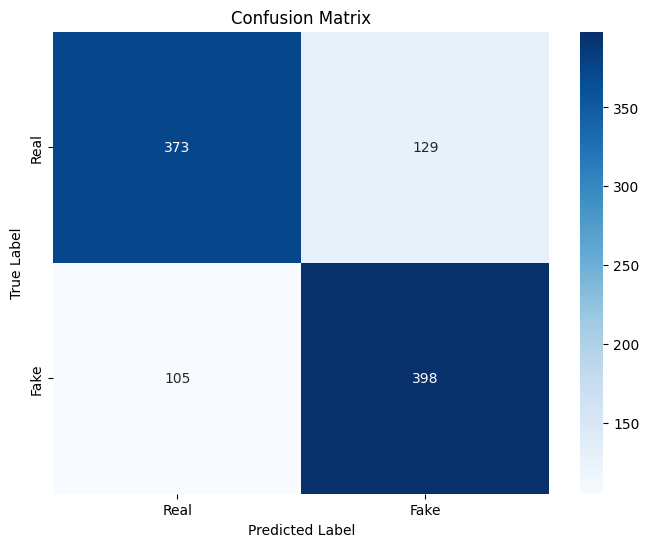

Classification Report:
              precision    recall  f1-score   support

        Real       0.78      0.74      0.76       502
        Fake       0.76      0.79      0.77       503

    accuracy                           0.77      1005
   macro avg       0.77      0.77      0.77      1005
weighted avg       0.77      0.77      0.77      1005



0it [00:00, ?it/s]<ipython-input-16-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [17:07,  2.04s/it]


[[1447  563]
 [ 438 1571]]


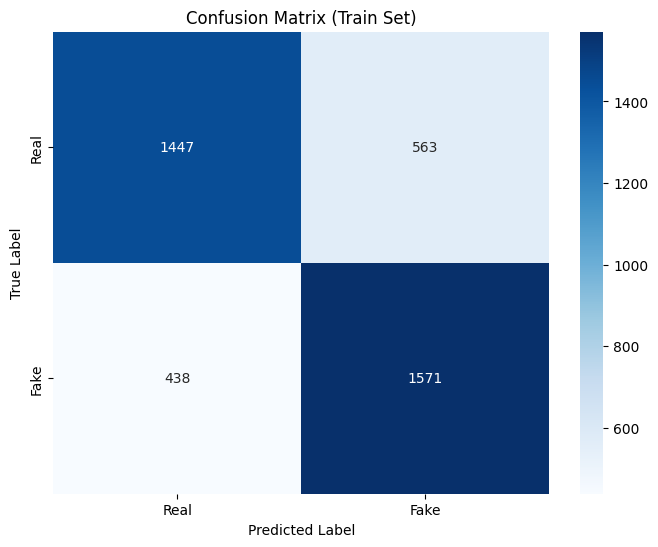

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.77      0.72      0.74      2010
        Fake       0.74      0.78      0.76      2009

    accuracy                           0.75      4019
   macro avg       0.75      0.75      0.75      4019
weighted avg       0.75      0.75      0.75      4019



<ipython-input-18-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 3, train loss: 0.4992137798376633, val loss: 1.9928931052249574, executed in: 1287.2172539234161
train total: 4019, train correct: 3018.0, train incorrect: 1001.0, train accuracy: 0.750933051109314
valid total: 1005, valid correct: 762.0, valid incorrect: 243.0, valid accuracy: 0.7582089900970459


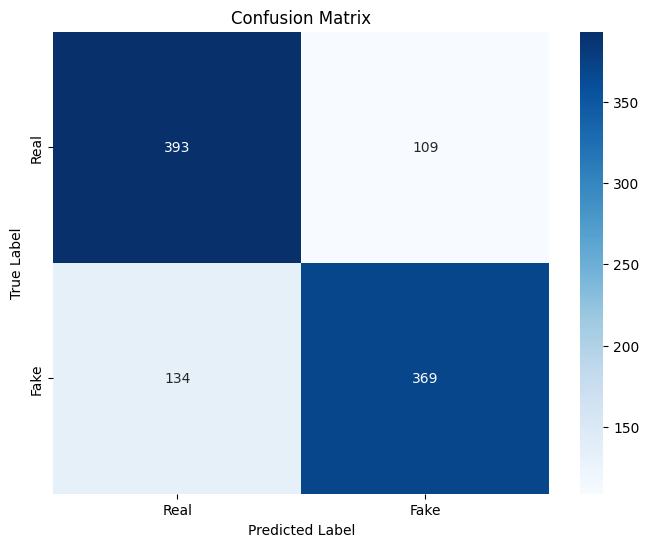

Classification Report:
              precision    recall  f1-score   support

        Real       0.75      0.78      0.76       502
        Fake       0.77      0.73      0.75       503

    accuracy                           0.76      1005
   macro avg       0.76      0.76      0.76      1005
weighted avg       0.76      0.76      0.76      1005

end time: 2024-11-10 17:48:33.646445
executed in: 3:03:45.536832
Tesla T4
Memory Usage:
Allocated: 0.1 GB
Cached:    0.2 GB


<ipython-input-21-eafc851a2a6c>:218: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


In [ ]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import datetime
import sys
import pandas as pd
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import gc


train_folders = ['/content/dfdc']
test_folders = ['/content/test_videos']

batch_size = int(8)
num_epochs = int(4)
n_frames = int(10)
lr = float(0.001)

TRAIN_FOLDERS = train_folders
TEST_FOLDERS = test_folders
print(f"all train folders: {train_folders}, {type(train_folders)}")
print(f"all test folders: {test_folders}, {type(test_folders)}")

gamma = 0.1
milestones = [6,12,18]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = FaceClassifier()
#model.load_state_dict(torch.load('/content/drive/MyDrive/b7_faces_224_b0_lstm_celebav_1_classifier_30_small.pt', map_location=device))
model = model.to(device)
class_weights = {0: 0.6191950464396285, 1: 10.1230}
weights_tensor = torch.tensor([class_weights[0], 10.1230], dtype=torch.float32).to(device)

# Modify the loss function
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)

start_time = datetime.datetime.now()
print(f'start time: {str(start_time)}')
print(f'using device: {device}')

'''Splitting into Train and Validation'''
train_dataset = FaceDeepfakeDataset(TRAIN_FOLDERS,  n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")
test_dataset = FaceDeepfakeDatasetTest(TEST_FOLDERS, n_frames=n_frames, n_audio_reads=576, device=device,  cache_folder="face_encode_cache")

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
print(len(train_loader))


'''Train_Loop'''
train_losses = []
val_losses = []
best_loss = np.inf
train_accuracies = []
val_accuracies = []
epoch_times = []


for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    gc.collect()
    for i, batch in tqdm(enumerate(train_loader)):
        torch.cuda.empty_cache()
        gc.collect()
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)

        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()

        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()
        gc.collect()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Train Set)')
    plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Real', 'Fake']))

    all_labels = []
    all_preds = []

    model.eval()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            torch.cuda.empty_cache()
            gc.collect()
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)
            torch.cuda.empty_cache()
            gc.collect()

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Real', 'Fake']))

    scheduler.step()
    ### Saving model per best validation loss
    if best_loss > val_losses[-1]:
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 1}_classifier_{n_frames}_small.pt')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 1}_classifier_{n_frames}_small.pt')


end_time = datetime.datetime.now()
print(f"end time: {str(end_time)}")
exec_time = end_time - start_time
print(f"executed in: {str(exec_time)}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


all train folders: ['/content/dfdc'], <class 'list'>
all test folders: ['/content/test_videos'], <class 'list'>


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 134MB/s]
<ipython-input-27-578a50b9e93a>:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses 

start time: 2024-11-11 07:50:50.668710
using device: cuda
503


/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

[[1538  472]
 [ 370 1639]]


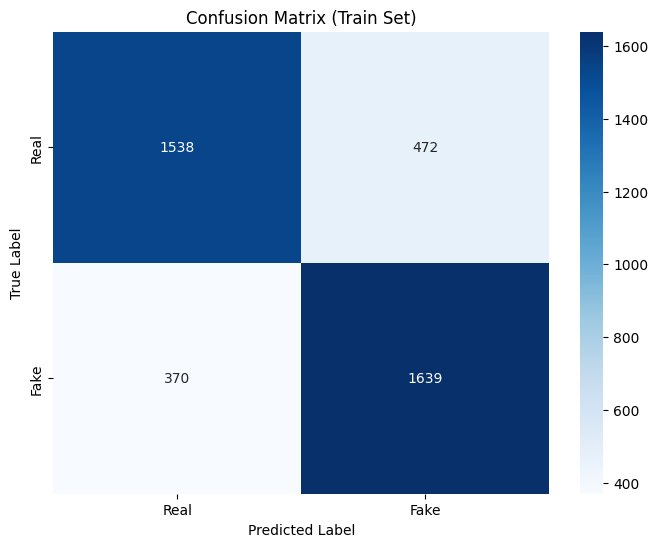

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.81      0.77      0.79      2010
        Fake       0.78      0.82      0.80      2009

    accuracy                           0.79      4019
   macro avg       0.79      0.79      0.79      4019
weighted avg       0.79      0.79      0.79      4019

..............................................................................................................................
epoch: 4, train loss: 0.442650418573061, val loss: 1.7670885757321404, executed in: 7197.352414369583
train total: 4019, train correct: 3177.0, train incorrect: 842.0, train accuracy: 0.7904950976371765
valid total: 1005, valid correct: 765.0, valid incorrect: 240.0, valid accuracy: 0.7611940503120422


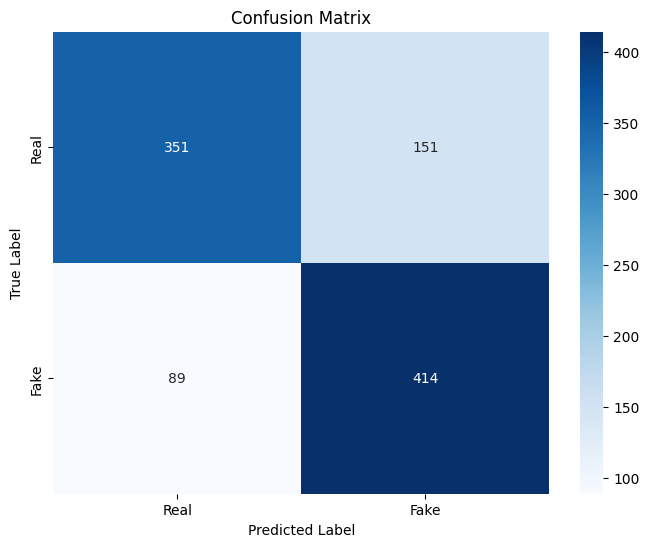

Classification Report:
              precision    recall  f1-score   support

        Real       0.80      0.70      0.75       502
        Fake       0.73      0.82      0.78       503

    accuracy                           0.76      1005
   macro avg       0.77      0.76      0.76      1005
weighted avg       0.77      0.76      0.76      1005



0it [00:00, ?it/s]<ipython-input-22-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [16:35,  1.98s/it]


[[1551  459]
 [ 365 1644]]


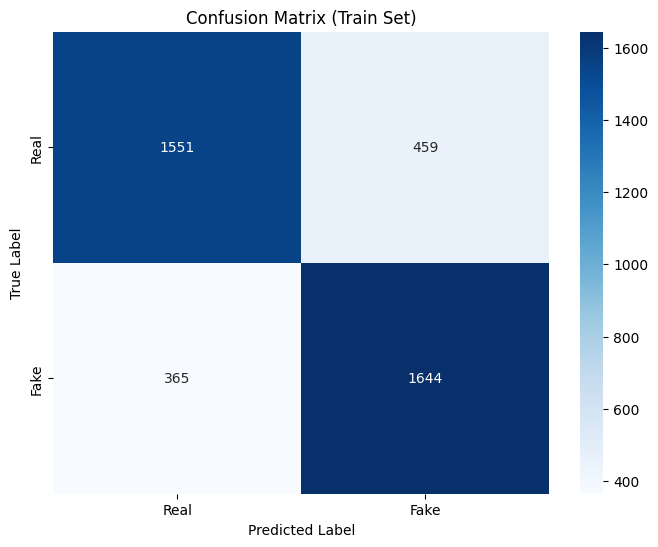

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.81      0.77      0.79      2010
        Fake       0.78      0.82      0.80      2009

    accuracy                           0.79      4019
   macro avg       0.80      0.79      0.79      4019
weighted avg       0.80      0.79      0.79      4019



<ipython-input-24-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 5, train loss: 0.43217002301223234, val loss: 1.725250171231372, executed in: 1242.2664804458618
train total: 4019, train correct: 3195.0, train incorrect: 824.0, train accuracy: 0.7949738502502441
valid total: 1005, valid correct: 781.0, valid incorrect: 224.0, valid accuracy: 0.7771144509315491


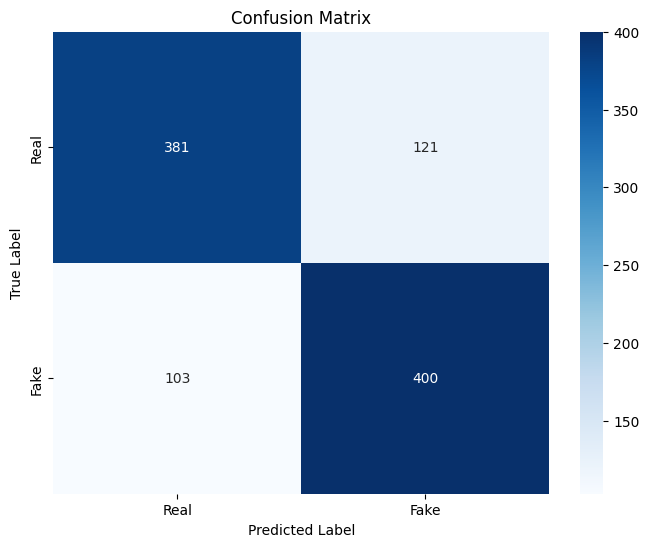

Classification Report:
              precision    recall  f1-score   support

        Real       0.79      0.76      0.77       502
        Fake       0.77      0.80      0.78       503

    accuracy                           0.78      1005
   macro avg       0.78      0.78      0.78      1005
weighted avg       0.78      0.78      0.78      1005



0it [00:00, ?it/s]<ipython-input-22-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [16:23,  1.96s/it]


[[1571  439]
 [ 307 1702]]


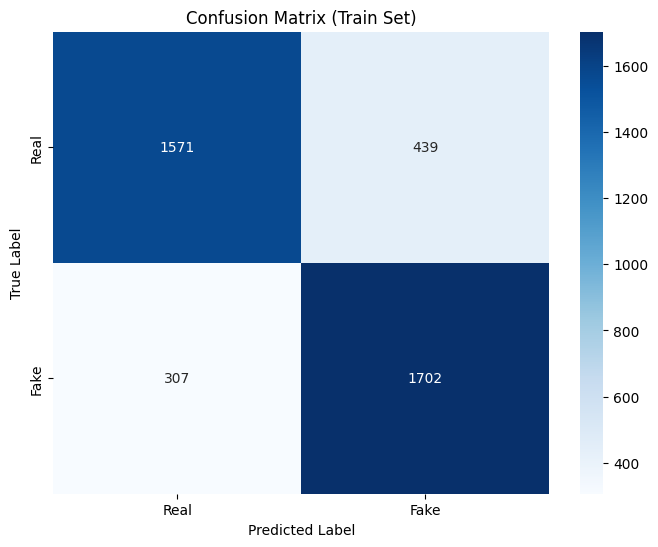

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.84      0.78      0.81      2010
        Fake       0.79      0.85      0.82      2009

    accuracy                           0.81      4019
   macro avg       0.82      0.81      0.81      4019
weighted avg       0.82      0.81      0.81      4019



<ipython-input-24-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 6, train loss: 0.3978406614873921, val loss: 1.5882051803822081, executed in: 1227.8573207855225
train total: 4019, train correct: 3273.0, train incorrect: 746.0, train accuracy: 0.8143816590309143
valid total: 1005, valid correct: 746.0, valid incorrect: 259.0, valid accuracy: 0.7422885894775391


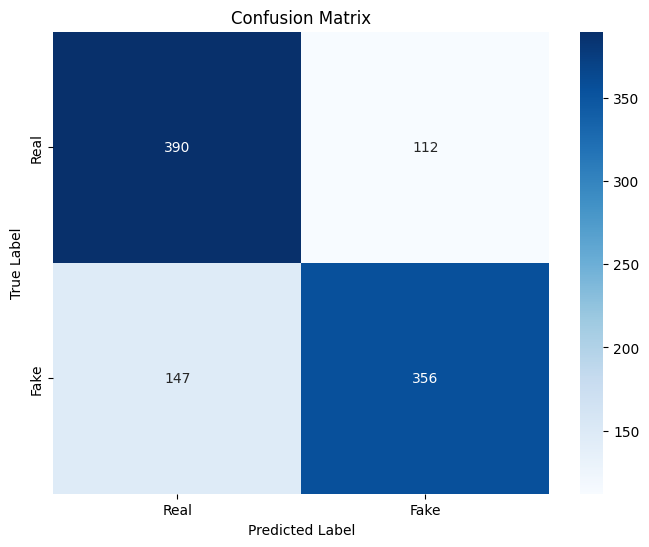

Classification Report:
              precision    recall  f1-score   support

        Real       0.73      0.78      0.75       502
        Fake       0.76      0.71      0.73       503

    accuracy                           0.74      1005
   macro avg       0.74      0.74      0.74      1005
weighted avg       0.74      0.74      0.74      1005



0it [00:00, ?it/s]<ipython-input-22-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [16:29,  1.97s/it]


[[1610  400]
 [ 295 1714]]


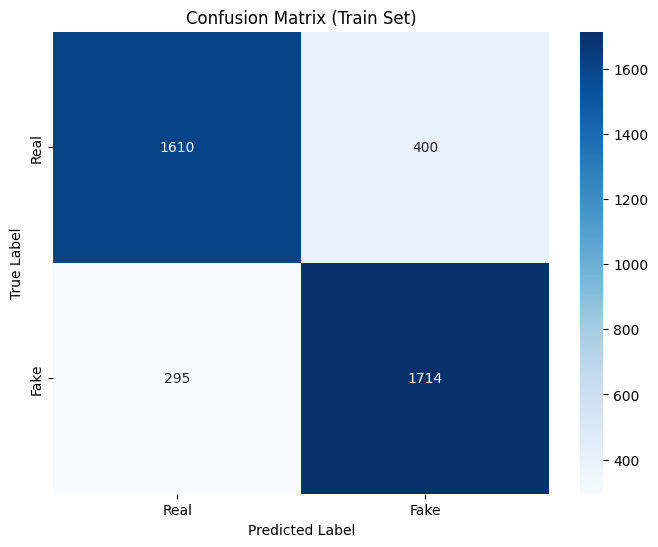

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.85      0.80      0.82      2010
        Fake       0.81      0.85      0.83      2009

    accuracy                           0.83      4019
   macro avg       0.83      0.83      0.83      4019
weighted avg       0.83      0.83      0.83      4019



<ipython-input-24-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 7, train loss: 0.377234547041638, val loss: 1.505944263190031, executed in: 1236.916374206543
train total: 4019, train correct: 3324.0, train incorrect: 695.0, train accuracy: 0.8270713686943054
valid total: 1005, valid correct: 776.0, valid incorrect: 229.0, valid accuracy: 0.772139310836792


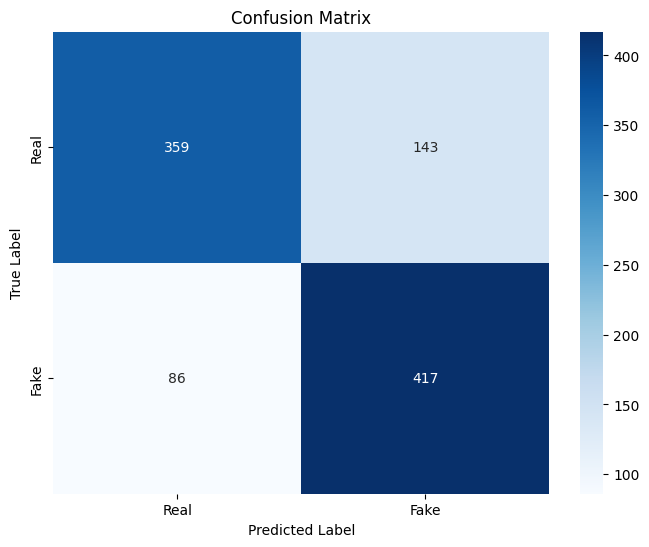

Classification Report:
              precision    recall  f1-score   support

        Real       0.81      0.72      0.76       502
        Fake       0.74      0.83      0.78       503

    accuracy                           0.77      1005
   macro avg       0.78      0.77      0.77      1005
weighted avg       0.78      0.77      0.77      1005



0it [00:00, ?it/s]<ipython-input-22-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [16:19,  1.95s/it]


[[1641  369]
 [ 277 1732]]


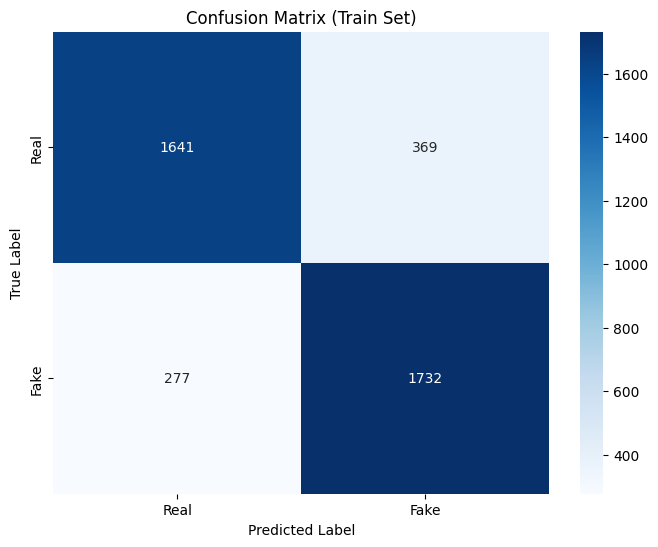

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.86      0.82      0.84      2010
        Fake       0.82      0.86      0.84      2009

    accuracy                           0.84      4019
   macro avg       0.84      0.84      0.84      4019
weighted avg       0.84      0.84      0.84      4019



<ipython-input-24-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 8, train loss: 0.35783634302215594, val loss: 1.4285054011122575, executed in: 1222.9869678020477
train total: 4019, train correct: 3373.0, train incorrect: 646.0, train accuracy: 0.8392634987831116
valid total: 1005, valid correct: 787.0, valid incorrect: 218.0, valid accuracy: 0.7830846309661865


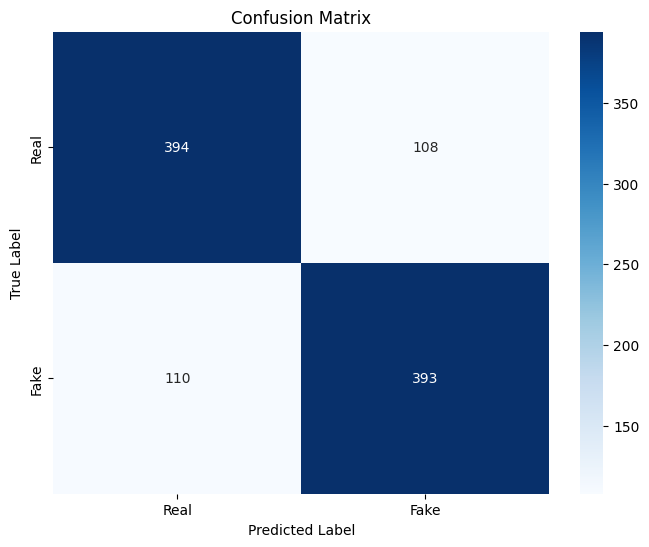

Classification Report:
              precision    recall  f1-score   support

        Real       0.78      0.78      0.78       502
        Fake       0.78      0.78      0.78       503

    accuracy                           0.78      1005
   macro avg       0.78      0.78      0.78      1005
weighted avg       0.78      0.78      0.78      1005

end time: 2024-11-11 11:13:01.402435
executed in: 3:22:10.733725
Tesla T4
Memory Usage:
Allocated: 0.1 GB
Cached:    0.2 GB


<ipython-input-27-578a50b9e93a>:218: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


In [ ]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import datetime
import sys
import pandas as pd
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import gc


train_folders = ['/content/dfdc']
test_folders = ['/content/test_videos']

batch_size = int(8)
num_epochs = int(5)
n_frames = int(10)
lr = float(0.001)

TRAIN_FOLDERS = train_folders
TEST_FOLDERS = test_folders
print(f"all train folders: {train_folders}, {type(train_folders)}")
print(f"all test folders: {test_folders}, {type(test_folders)}")

gamma = 0.1
milestones = [6,12,18]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = FaceClassifier()
model.load_state_dict(torch.load('/content/dfdc_5k_train_test_split_b0_4_classifier_10_small.pt', map_location=device))
model = model.to(device)
class_weights = {0: 0.6191950464396285, 1: 10.1230}
weights_tensor = torch.tensor([class_weights[0], 10.1230], dtype=torch.float32).to(device)

# Modify the loss function
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)

start_time = datetime.datetime.now()
print(f'start time: {str(start_time)}')
print(f'using device: {device}')

'''Splitting into Train and Validation'''
train_dataset = FaceDeepfakeDataset(TRAIN_FOLDERS,  n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")
test_dataset = FaceDeepfakeDatasetTest(TEST_FOLDERS, n_frames=n_frames, n_audio_reads=576, device=device,  cache_folder="face_encode_cache")

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
print(len(train_loader))


'''Train_Loop'''
train_losses = []
val_losses = []
best_loss = np.inf
train_accuracies = []
val_accuracies = []
epoch_times = []


for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    gc.collect()
    for i, batch in tqdm(enumerate(train_loader)):
        torch.cuda.empty_cache()
        gc.collect()
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)

        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()

        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()
        gc.collect()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Train Set)')
    plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Real', 'Fake']))

    all_labels = []
    all_preds = []

    model.eval()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            torch.cuda.empty_cache()
            gc.collect()
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)
            torch.cuda.empty_cache()
            gc.collect()

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch + 4}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Real', 'Fake']))

    scheduler.step()
    ### Saving model per best validation loss
    if best_loss > val_losses[-1]:
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 5}_classifier_{n_frames}_small.pt')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 5}_classifier_{n_frames}_small.pt')


end_time = datetime.datetime.now()
print(f"end time: {str(end_time)}")
exec_time = end_time - start_time
print(f"executed in: {str(exec_time)}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


all train folders: ['/content/dfdc'], <class 'list'>
all test folders: ['/content/test_videos'], <class 'list'>


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 128MB/s] 
<ipython-input-22-af8ecd387bc9>:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses

start time: 2024-11-11 11:50:19.957663
using device: cuda
503


/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

[[1662  348]
 [ 241 1768]]


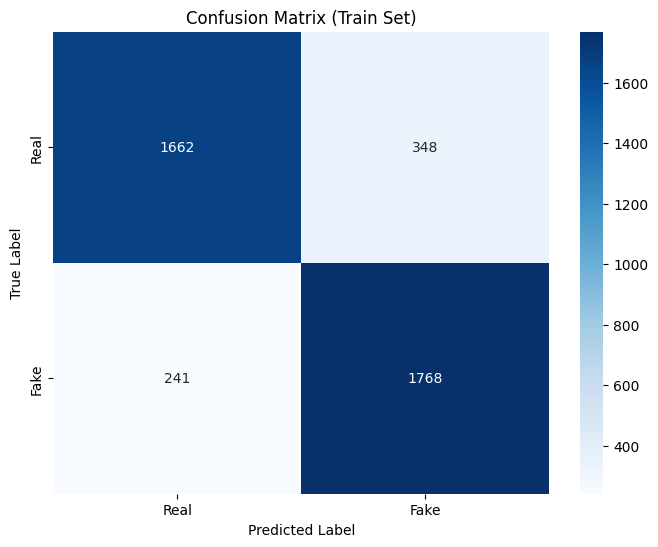

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.87      0.83      0.85      2010
        Fake       0.84      0.88      0.86      2009

    accuracy                           0.85      4019
   macro avg       0.85      0.85      0.85      4019
weighted avg       0.85      0.85      0.85      4019

..............................................................................................................................
epoch: 9, train loss: 0.3255711074688918, val loss: 1.2997005321972428, executed in: 7353.806949138641
train total: 4019, train correct: 3430.0, train incorrect: 589.0, train accuracy: 0.8534461259841919
valid total: 1005, valid correct: 780.0, valid incorrect: 225.0, valid accuracy: 0.7761194109916687


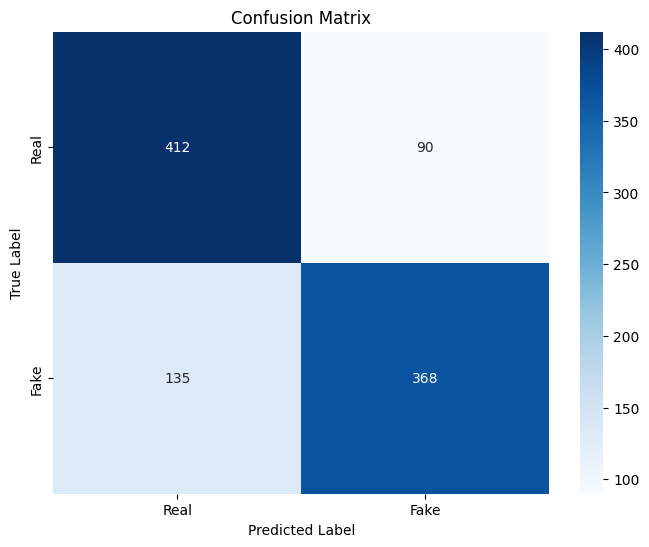

Classification Report:
              precision    recall  f1-score   support

        Real       0.75      0.82      0.79       502
        Fake       0.80      0.73      0.77       503

    accuracy                           0.78      1005
   macro avg       0.78      0.78      0.78      1005
weighted avg       0.78      0.78      0.78      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [16:41,  1.99s/it]


[[1675  335]
 [ 258 1751]]


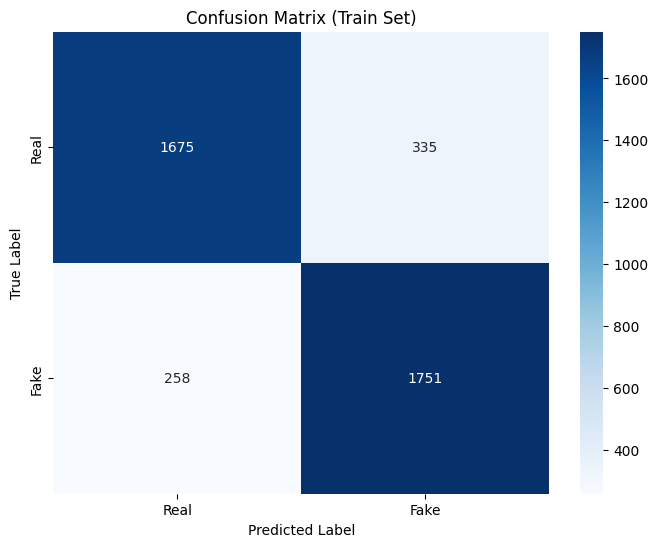

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.87      0.83      0.85      2010
        Fake       0.84      0.87      0.86      2009

    accuracy                           0.85      4019
   macro avg       0.85      0.85      0.85      4019
weighted avg       0.85      0.85      0.85      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 10, train loss: 0.31575217379801435, val loss: 1.2605027255587398, executed in: 1247.182631969452
train total: 4019, train correct: 3426.0, train incorrect: 593.0, train accuracy: 0.8524508476257324
valid total: 1005, valid correct: 767.0, valid incorrect: 238.0, valid accuracy: 0.763184130191803


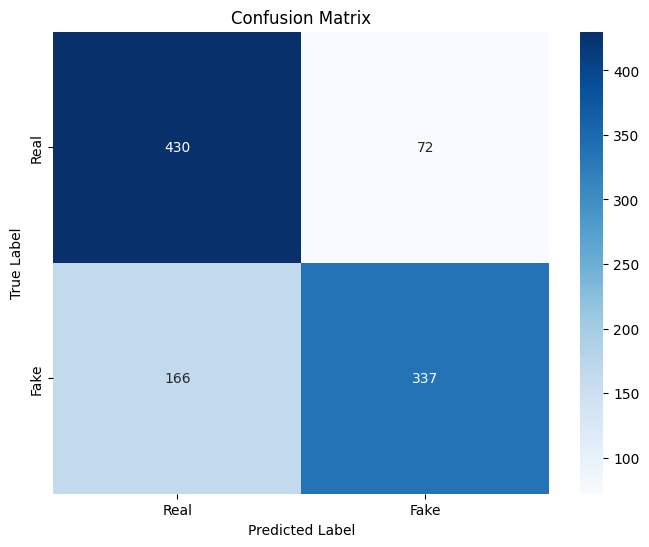

Classification Report:
              precision    recall  f1-score   support

        Real       0.72      0.86      0.78       502
        Fake       0.82      0.67      0.74       503

    accuracy                           0.76      1005
   macro avg       0.77      0.76      0.76      1005
weighted avg       0.77      0.76      0.76      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [16:31,  1.97s/it]


[[1706  304]
 [ 232 1777]]


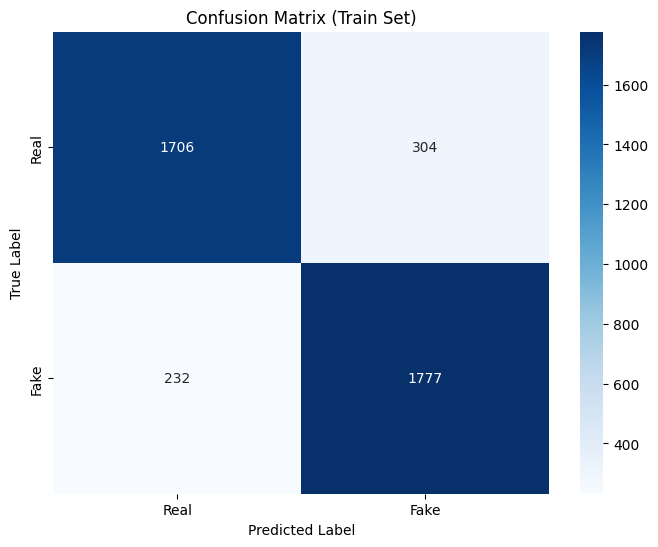

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.88      0.85      0.86      2010
        Fake       0.85      0.88      0.87      2009

    accuracy                           0.87      4019
   macro avg       0.87      0.87      0.87      4019
weighted avg       0.87      0.87      0.87      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 11, train loss: 0.2982346173338814, val loss: 1.190571527928114, executed in: 1237.21608877182
train total: 4019, train correct: 3483.0, train incorrect: 536.0, train accuracy: 0.8666334748268127
valid total: 1005, valid correct: 808.0, valid incorrect: 197.0, valid accuracy: 0.8039801120758057


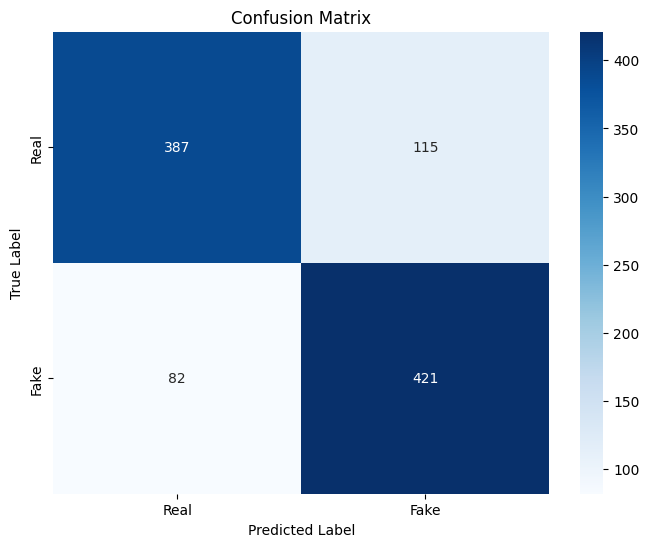

Classification Report:
              precision    recall  f1-score   support

        Real       0.83      0.77      0.80       502
        Fake       0.79      0.84      0.81       503

    accuracy                           0.80      1005
   macro avg       0.81      0.80      0.80      1005
weighted avg       0.81      0.80      0.80      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [16:35,  1.98s/it]


[[1721  289]
 [ 229 1780]]


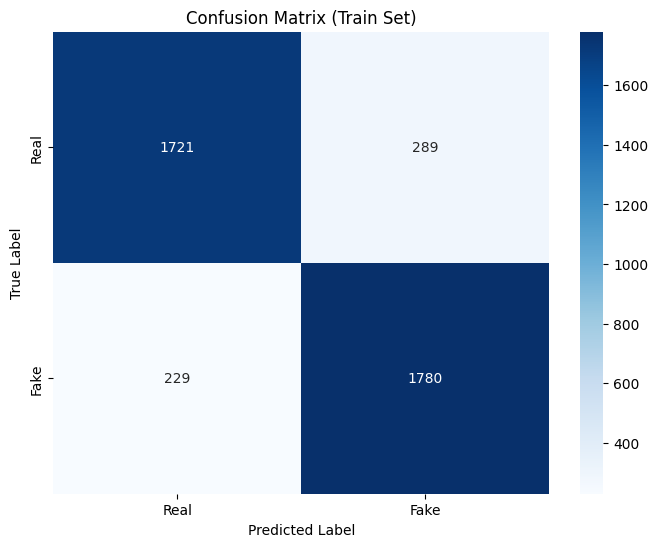

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.88      0.86      0.87      2010
        Fake       0.86      0.89      0.87      2009

    accuracy                           0.87      4019
   macro avg       0.87      0.87      0.87      4019
weighted avg       0.87      0.87      0.87      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 12, train loss: 0.293703449297526, val loss: 1.1724828174337745, executed in: 1249.1223363876343
train total: 4019, train correct: 3501.0, train incorrect: 518.0, train accuracy: 0.8711121678352356
valid total: 1005, valid correct: 774.0, valid incorrect: 231.0, valid accuracy: 0.770149290561676


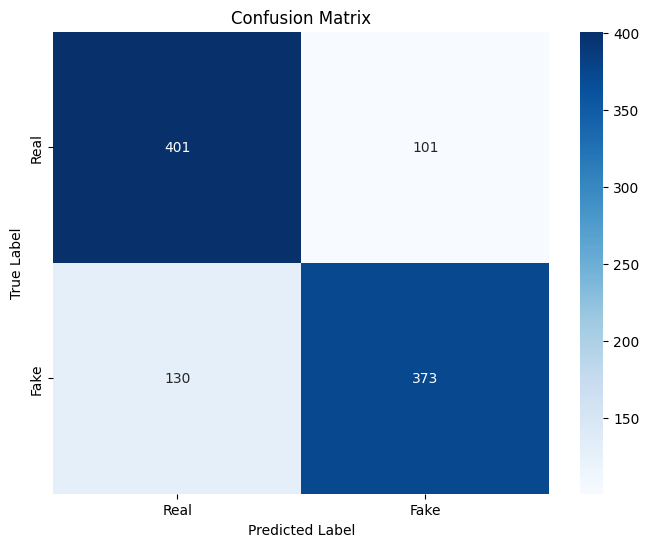

Classification Report:
              precision    recall  f1-score   support

        Real       0.76      0.80      0.78       502
        Fake       0.79      0.74      0.76       503

    accuracy                           0.77      1005
   macro avg       0.77      0.77      0.77      1005
weighted avg       0.77      0.77      0.77      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [16:38,  1.98s/it]


[[1733  277]
 [ 230 1779]]


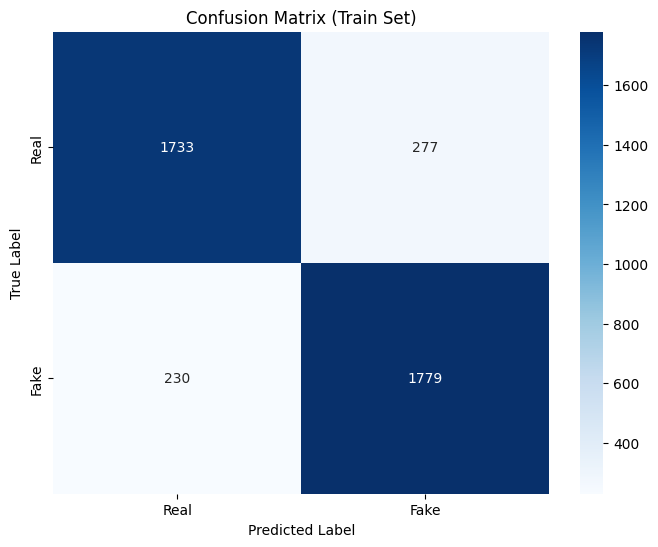

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.88      0.86      0.87      2010
        Fake       0.87      0.89      0.88      2009

    accuracy                           0.87      4019
   macro avg       0.87      0.87      0.87      4019
weighted avg       0.87      0.87      0.87      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 13, train loss: 0.28410333135048627, val loss: 1.1341585370578937, executed in: 1248.3776185512543
train total: 4019, train correct: 3512.0, train incorrect: 507.0, train accuracy: 0.8738492131233215
valid total: 1005, valid correct: 793.0, valid incorrect: 212.0, valid accuracy: 0.7890547513961792


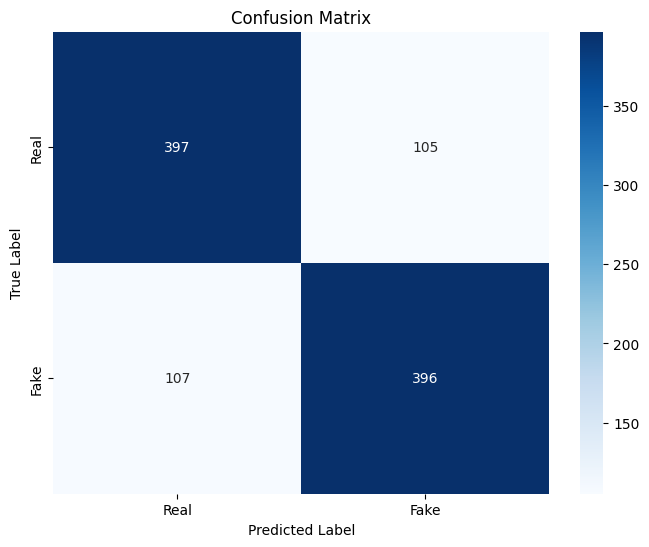

Classification Report:
              precision    recall  f1-score   support

        Real       0.79      0.79      0.79       502
        Fake       0.79      0.79      0.79       503

    accuracy                           0.79      1005
   macro avg       0.79      0.79      0.79      1005
weighted avg       0.79      0.79      0.79      1005

end time: 2024-11-11 15:15:58.672225
executed in: 3:25:38.714562
Tesla T4
Memory Usage:
Allocated: 0.1 GB
Cached:    0.2 GB


<ipython-input-22-af8ecd387bc9>:218: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


In [ ]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import datetime
import sys
import pandas as pd
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import gc


train_folders = ['/content/dfdc']
test_folders = ['/content/test_videos']

batch_size = int(8)
num_epochs = int(5)
n_frames = int(10)
lr = float(0.001)

TRAIN_FOLDERS = train_folders
TEST_FOLDERS = test_folders
print(f"all train folders: {train_folders}, {type(train_folders)}")
print(f"all test folders: {test_folders}, {type(test_folders)}")

gamma = 0.1
milestones = [6,12,18]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = FaceClassifier()
model.load_state_dict(torch.load('/content/dfdc_5k_train_test_split_b0_9_classifier_10_small.pt', map_location=device))
model = model.to(device)
class_weights = {0: 0.6191950464396285, 1: 10.1230}
weights_tensor = torch.tensor([class_weights[0], 10.1230], dtype=torch.float32).to(device)

# Modify the loss function
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)

start_time = datetime.datetime.now()
print(f'start time: {str(start_time)}')
print(f'using device: {device}')

'''Splitting into Train and Validation'''
train_dataset = FaceDeepfakeDataset(TRAIN_FOLDERS,  n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")
test_dataset = FaceDeepfakeDatasetTest(TEST_FOLDERS, n_frames=n_frames, n_audio_reads=576, device=device,  cache_folder="face_encode_cache")

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
print(len(train_loader))


'''Train_Loop'''
train_losses = []
val_losses = []
best_loss = np.inf
train_accuracies = []
val_accuracies = []
epoch_times = []


for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    gc.collect()
    for i, batch in tqdm(enumerate(train_loader)):
        torch.cuda.empty_cache()
        gc.collect()
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)

        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()

        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()
        gc.collect()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Train Set)')
    plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Real', 'Fake']))

    all_labels = []
    all_preds = []

    model.eval()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            torch.cuda.empty_cache()
            gc.collect()
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)
            torch.cuda.empty_cache()
            gc.collect()

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch + 9}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Real', 'Fake']))

    scheduler.step()
    ### Saving model per best validation loss
    if best_loss > val_losses[-1]:
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 9}_classifier_{n_frames}_small.pt')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 9}_classifier_{n_frames}_small.pt')


end_time = datetime.datetime.now()
print(f"end time: {str(end_time)}")
exec_time = end_time - start_time
print(f"executed in: {str(exec_time)}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


all train folders: ['/content/dfdc'], <class 'list'>
all test folders: ['/content/test_videos'], <class 'list'>


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 127MB/s]
<ipython-input-22-7d305fd59426>:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses 

start time: 2024-11-11 15:51:19.625154
using device: cuda
503


/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

[[1740  270]
 [ 200 1809]]


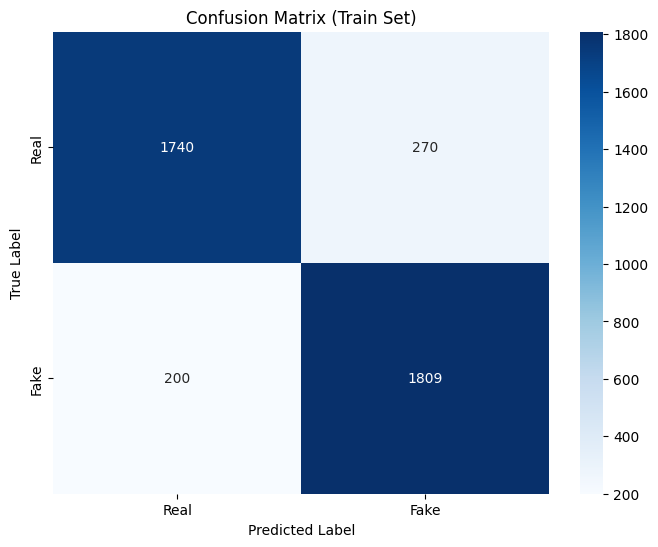

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.90      0.87      0.88      2010
        Fake       0.87      0.90      0.89      2009

    accuracy                           0.88      4019
   macro avg       0.88      0.88      0.88      4019
weighted avg       0.88      0.88      0.88      4019

..............................................................................................................................
epoch: 13, train loss: 0.27486529755989314, val loss: 1.0972797196240178, executed in: 7403.324685573578
train total: 4019, train correct: 3549.0, train incorrect: 470.0, train accuracy: 0.8830554485321045
valid total: 1005, valid correct: 780.0, valid incorrect: 225.0, valid accuracy: 0.7761194109916687


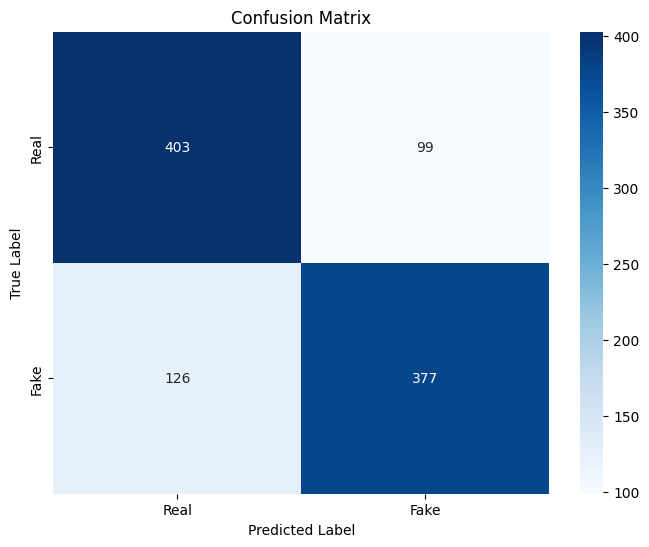

Classification Report:
              precision    recall  f1-score   support

        Real       0.76      0.80      0.78       502
        Fake       0.79      0.75      0.77       503

    accuracy                           0.78      1005
   macro avg       0.78      0.78      0.78      1005
weighted avg       0.78      0.78      0.78      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [17:04,  2.04s/it]


[[1768  242]
 [ 192 1817]]


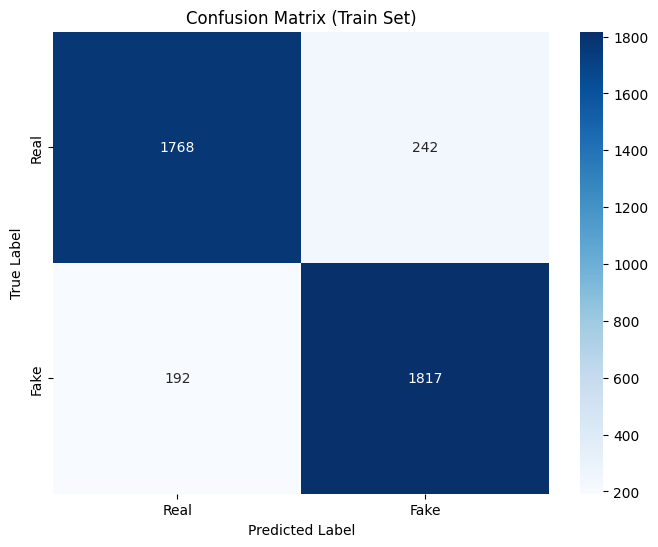

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.90      0.88      0.89      2010
        Fake       0.88      0.90      0.89      2009

    accuracy                           0.89      4019
   macro avg       0.89      0.89      0.89      4019
weighted avg       0.89      0.89      0.89      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 14, train loss: 0.24898171390242, val loss: 0.9939508102612481, executed in: 1276.7914135456085
train total: 4019, train correct: 3585.0, train incorrect: 434.0, train accuracy: 0.892012894153595
valid total: 1005, valid correct: 771.0, valid incorrect: 234.0, valid accuracy: 0.7671642303466797


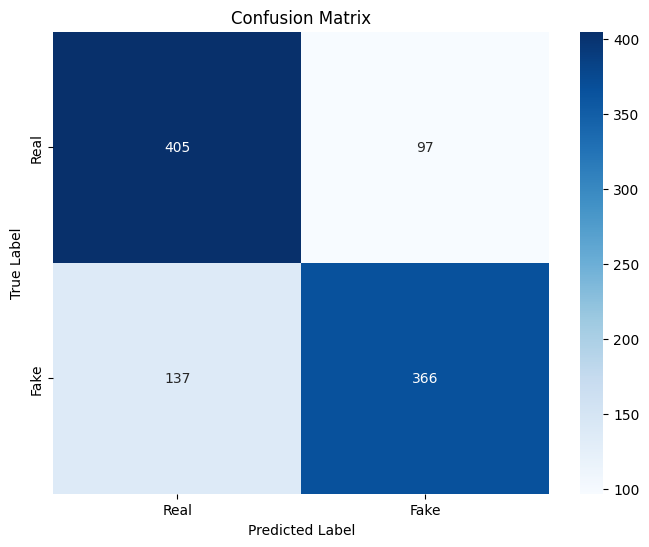

Classification Report:
              precision    recall  f1-score   support

        Real       0.75      0.81      0.78       502
        Fake       0.79      0.73      0.76       503

    accuracy                           0.77      1005
   macro avg       0.77      0.77      0.77      1005
weighted avg       0.77      0.77      0.77      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
242it [07:53,  1.94s/it]

In [ ]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import datetime
import sys
import pandas as pd
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import gc


train_folders = ['/content/dfdc']
test_folders = ['/content/test_videos']

batch_size = int(8)
num_epochs = int(3)
n_frames = int(10)
lr = float(0.001)

TRAIN_FOLDERS = train_folders
TEST_FOLDERS = test_folders
print(f"all train folders: {train_folders}, {type(train_folders)}")
print(f"all test folders: {test_folders}, {type(test_folders)}")

gamma = 0.1
milestones = [6,12,18]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = FaceClassifier()
model.load_state_dict(torch.load('/content/dfdc_5k_train_test_split_b0_13_classifier_10_small.pt', map_location=device))
model = model.to(device)
class_weights = {0: 0.6191950464396285, 1: 10.1230}
weights_tensor = torch.tensor([class_weights[0], 10.1230], dtype=torch.float32).to(device)

# Modify the loss function
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)

start_time = datetime.datetime.now()
print(f'start time: {str(start_time)}')
print(f'using device: {device}')

'''Splitting into Train and Validation'''
train_dataset = FaceDeepfakeDataset(TRAIN_FOLDERS,  n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")
test_dataset = FaceDeepfakeDatasetTest(TEST_FOLDERS, n_frames=n_frames, n_audio_reads=576, device=device,  cache_folder="face_encode_cache")

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
print(len(train_loader))


'''Train_Loop'''
train_losses = []
val_losses = []
best_loss = np.inf
train_accuracies = []
val_accuracies = []
epoch_times = []


for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    gc.collect()
    for i, batch in tqdm(enumerate(train_loader)):
        torch.cuda.empty_cache()
        gc.collect()
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)

        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()

        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()
        gc.collect()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Train Set)')
    plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Real', 'Fake']))

    all_labels = []
    all_preds = []

    model.eval()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            torch.cuda.empty_cache()
            gc.collect()
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)
            torch.cuda.empty_cache()
            gc.collect()

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch + 13}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Real', 'Fake']))

    scheduler.step()
    ### Saving model per best validation loss
    if best_loss > val_losses[-1]:
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 13}_classifier_{n_frames}_small.pt')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 13}_classifier_{n_frames}_small.pt')


end_time = datetime.datetime.now()
print(f"end time: {str(end_time)}")
exec_time = end_time - start_time
print(f"executed in: {str(exec_time)}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


all train folders: ['/content/dfdc'], <class 'list'>
all test folders: ['/content/test_videos'], <class 'list'>


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 134MB/s] 
<ipython-input-22-a88009b20f36>:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses

start time: 2024-11-11 19:13:55.042082
using device: cuda
503


/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

[[1779  231]
 [ 185 1824]]


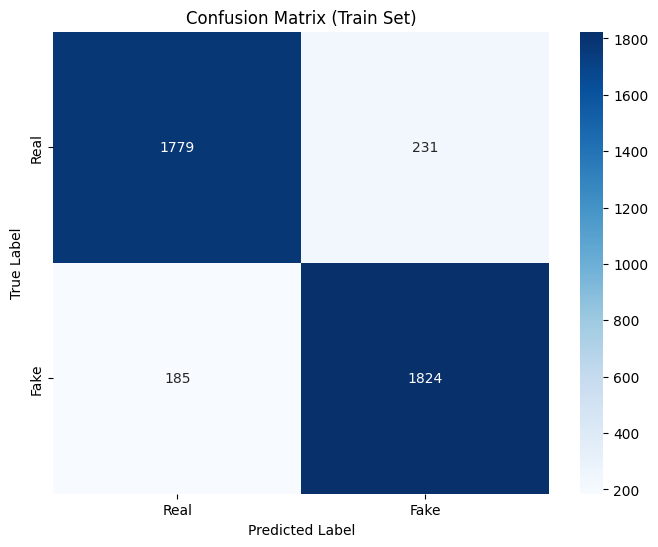

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.91      0.89      0.90      2010
        Fake       0.89      0.91      0.90      2009

    accuracy                           0.90      4019
   macro avg       0.90      0.90      0.90      4019
weighted avg       0.90      0.90      0.90      4019

..............................................................................................................................
epoch: 15, train loss: 0.244213942514277, val loss: 0.9749175641641376, executed in: 7180.9282784461975
train total: 4019, train correct: 3603.0, train incorrect: 416.0, train accuracy: 0.8964916467666626
valid total: 1005, valid correct: 781.0, valid incorrect: 224.0, valid accuracy: 0.7771144509315491


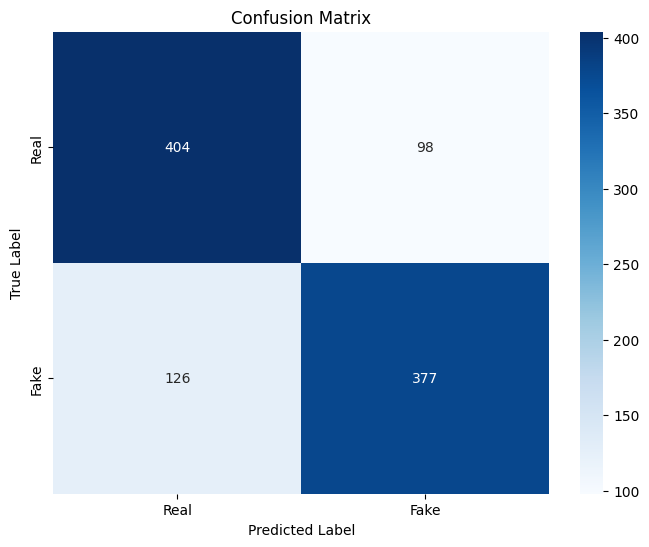

Classification Report:
              precision    recall  f1-score   support

        Real       0.76      0.80      0.78       502
        Fake       0.79      0.75      0.77       503

    accuracy                           0.78      1005
   macro avg       0.78      0.78      0.78      1005
weighted avg       0.78      0.78      0.78      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [16:42,  1.99s/it]


[[1798  212]
 [ 191 1818]]


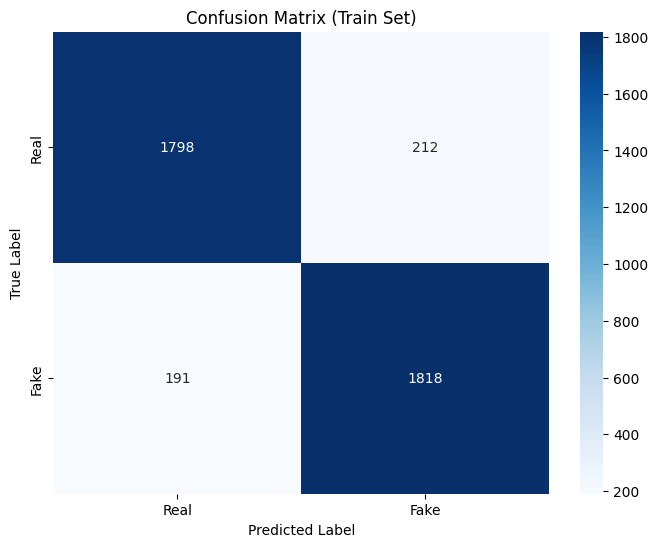

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.90      0.89      0.90      2010
        Fake       0.90      0.90      0.90      2009

    accuracy                           0.90      4019
   macro avg       0.90      0.90      0.90      4019
weighted avg       0.90      0.90      0.90      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 16, train loss: 0.23080139413288986, val loss: 0.9213738194352666, executed in: 1253.5397243499756
train total: 4019, train correct: 3616.0, train incorrect: 403.0, train accuracy: 0.8997262716293335
valid total: 1005, valid correct: 773.0, valid incorrect: 232.0, valid accuracy: 0.7691542506217957


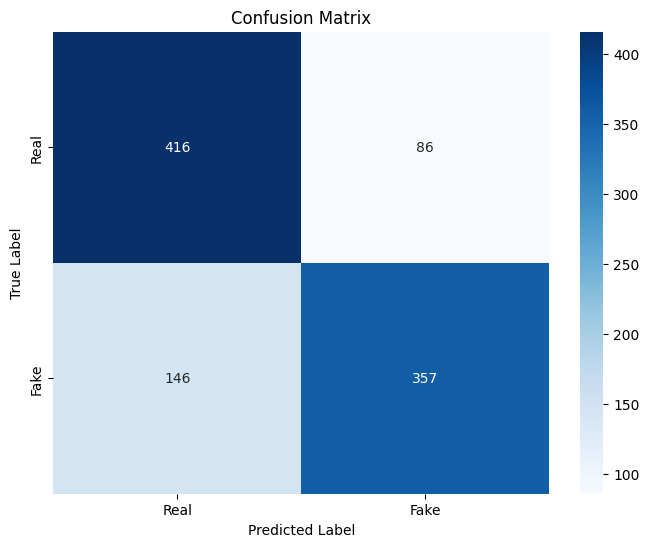

Classification Report:
              precision    recall  f1-score   support

        Real       0.74      0.83      0.78       502
        Fake       0.81      0.71      0.75       503

    accuracy                           0.77      1005
   macro avg       0.77      0.77      0.77      1005
weighted avg       0.77      0.77      0.77      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [17:07,  2.04s/it]


[[1808  202]
 [ 173 1836]]


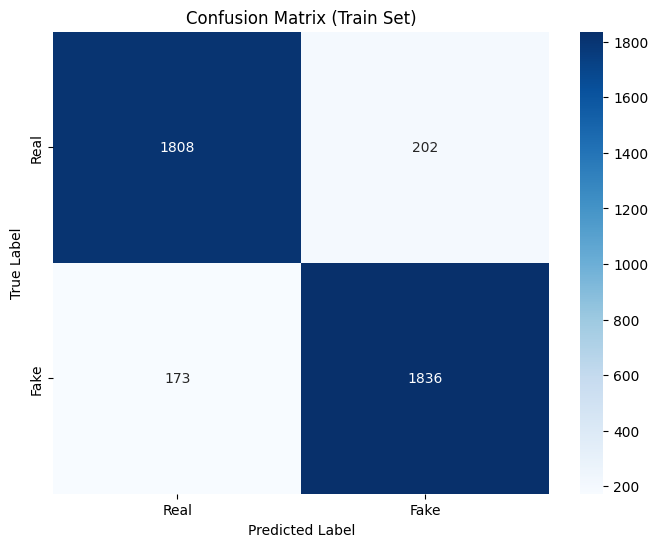

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.91      0.90      0.91      2010
        Fake       0.90      0.91      0.91      2009

    accuracy                           0.91      4019
   macro avg       0.91      0.91      0.91      4019
weighted avg       0.91      0.91      0.91      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 17, train loss: 0.22970554756952327, val loss: 0.9169991303767476, executed in: 1277.0533514022827
train total: 4019, train correct: 3644.0, train incorrect: 375.0, train accuracy: 0.906693160533905
valid total: 1005, valid correct: 787.0, valid incorrect: 218.0, valid accuracy: 0.7830846309661865


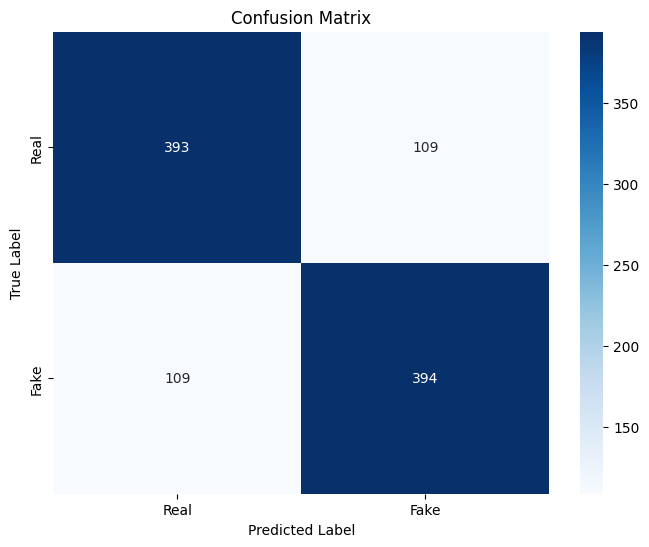

Classification Report:
              precision    recall  f1-score   support

        Real       0.78      0.78      0.78       502
        Fake       0.78      0.78      0.78       503

    accuracy                           0.78      1005
   macro avg       0.78      0.78      0.78      1005
weighted avg       0.78      0.78      0.78      1005

end time: 2024-11-11 21:55:48.375356
executed in: 2:41:53.333274
Tesla T4
Memory Usage:
Allocated: 0.1 GB
Cached:    0.2 GB


<ipython-input-22-a88009b20f36>:218: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


In [ ]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import datetime
import sys
import pandas as pd
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import gc


train_folders = ['/content/dfdc']
test_folders = ['/content/test_videos']

batch_size = int(8)
num_epochs = int(3)
n_frames = int(10)
lr = float(0.001)

TRAIN_FOLDERS = train_folders
TEST_FOLDERS = test_folders
print(f"all train folders: {train_folders}, {type(train_folders)}")
print(f"all test folders: {test_folders}, {type(test_folders)}")

gamma = 0.1
milestones = [6,12,18]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = FaceClassifier()
model.load_state_dict(torch.load('/content/dfdc_5k_train_test_split_b0_14_classifier_10_small.pt', map_location=device))
model = model.to(device)
class_weights = {0: 0.6191950464396285, 1: 10.1230}
weights_tensor = torch.tensor([class_weights[0], 10.1230], dtype=torch.float32).to(device)

# Modify the loss function
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)

start_time = datetime.datetime.now()
print(f'start time: {str(start_time)}')
print(f'using device: {device}')

'''Splitting into Train and Validation'''
train_dataset = FaceDeepfakeDataset(TRAIN_FOLDERS,  n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")
test_dataset = FaceDeepfakeDatasetTest(TEST_FOLDERS, n_frames=n_frames, n_audio_reads=576, device=device,  cache_folder="face_encode_cache")

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
print(len(train_loader))


'''Train_Loop'''
train_losses = []
val_losses = []
best_loss = np.inf
train_accuracies = []
val_accuracies = []
epoch_times = []


for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    gc.collect()
    for i, batch in tqdm(enumerate(train_loader)):
        torch.cuda.empty_cache()
        gc.collect()
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)

        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()

        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()
        gc.collect()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Train Set)')
    plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Real', 'Fake']))

    all_labels = []
    all_preds = []

    model.eval()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            torch.cuda.empty_cache()
            gc.collect()
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)
            torch.cuda.empty_cache()
            gc.collect()

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch + 15}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Real', 'Fake']))

    scheduler.step()
    ### Saving model per best validation loss
    if best_loss > val_losses[-1]:
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 15}_classifier_{n_frames}_small.pt')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 15}_classifier_{n_frames}_small.pt')


end_time = datetime.datetime.now()
print(f"end time: {str(end_time)}")
exec_time = end_time - start_time
print(f"executed in: {str(exec_time)}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


all train folders: ['/content/dfdc'], <class 'list'>
all test folders: ['/content/test_videos'], <class 'list'>


100%|██████████| 20.5M/20.5M [00:00<00:00, 146MB/s]
<ipython-input-22-d6c71fc491a8>:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/cont

start time: 2024-11-12 08:58:59.089479
using device: cuda
503


/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

[[1800  210]
 [ 168 1841]]


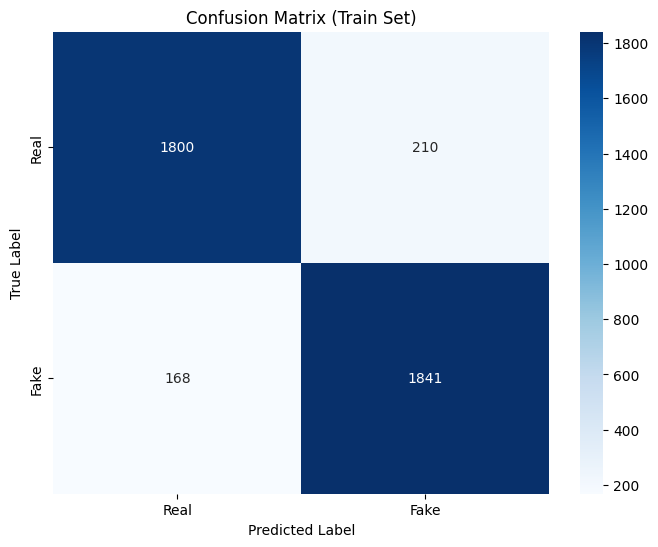

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.91      0.90      0.90      2010
        Fake       0.90      0.92      0.91      2009

    accuracy                           0.91      4019
   macro avg       0.91      0.91      0.91      4019
weighted avg       0.91      0.91      0.91      4019

..............................................................................................................................
epoch: 16, train loss: 0.2305048958756674, val loss: 0.9201901795671484, executed in: 7564.532880306244
train total: 4019, train correct: 3641.0, train incorrect: 378.0, train accuracy: 0.9059467315673828
valid total: 1005, valid correct: 784.0, valid incorrect: 221.0, valid accuracy: 0.7800995111465454


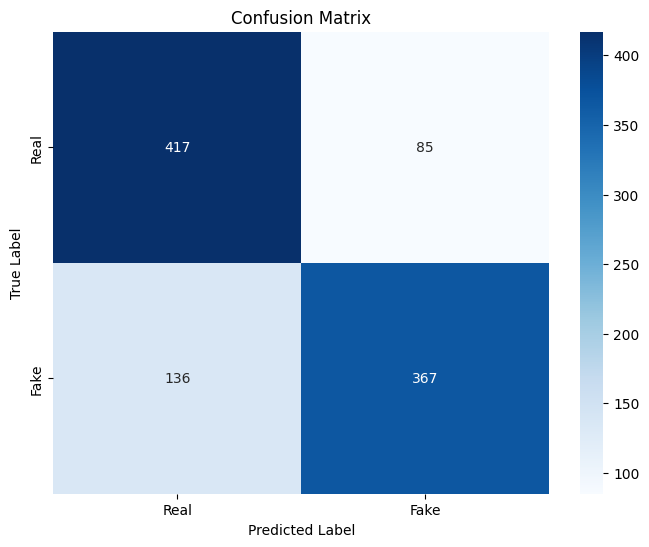

Classification Report:
              precision    recall  f1-score   support

        Real       0.75      0.83      0.79       502
        Fake       0.81      0.73      0.77       503

    accuracy                           0.78      1005
   macro avg       0.78      0.78      0.78      1005
weighted avg       0.78      0.78      0.78      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [17:23,  2.07s/it]


[[1821  189]
 [ 170 1839]]


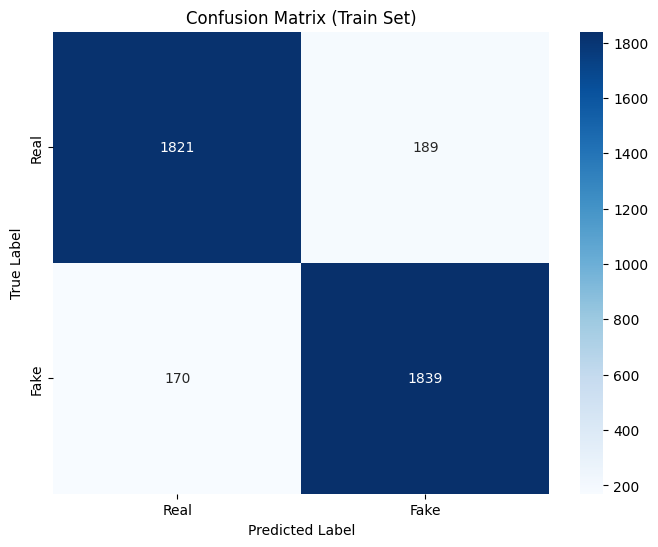

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.91      0.91      0.91      2010
        Fake       0.91      0.92      0.91      2009

    accuracy                           0.91      4019
   macro avg       0.91      0.91      0.91      4019
weighted avg       0.91      0.91      0.91      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 17, train loss: 0.20945311657099375, val loss: 0.836150139961983, executed in: 1302.0191416740417
train total: 4019, train correct: 3660.0, train incorrect: 359.0, train accuracy: 0.9106742739677429
valid total: 1005, valid correct: 786.0, valid incorrect: 219.0, valid accuracy: 0.7820895910263062


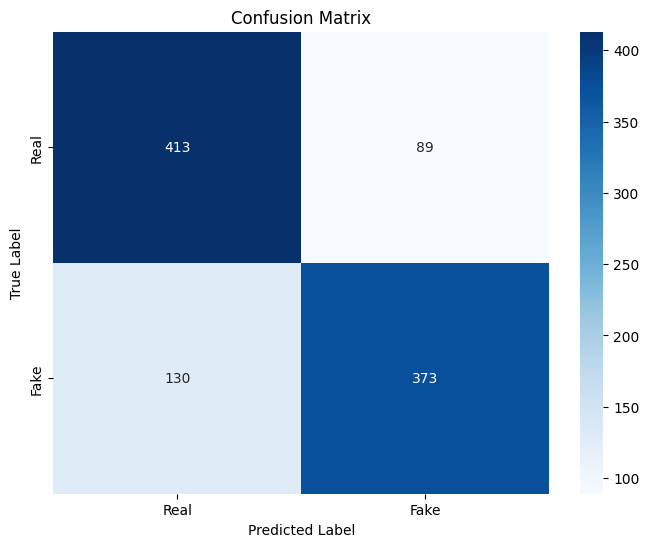

Classification Report:
              precision    recall  f1-score   support

        Real       0.76      0.82      0.79       502
        Fake       0.81      0.74      0.77       503

    accuracy                           0.78      1005
   macro avg       0.78      0.78      0.78      1005
weighted avg       0.78      0.78      0.78      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [17:10,  2.05s/it]


[[1804  206]
 [ 176 1833]]


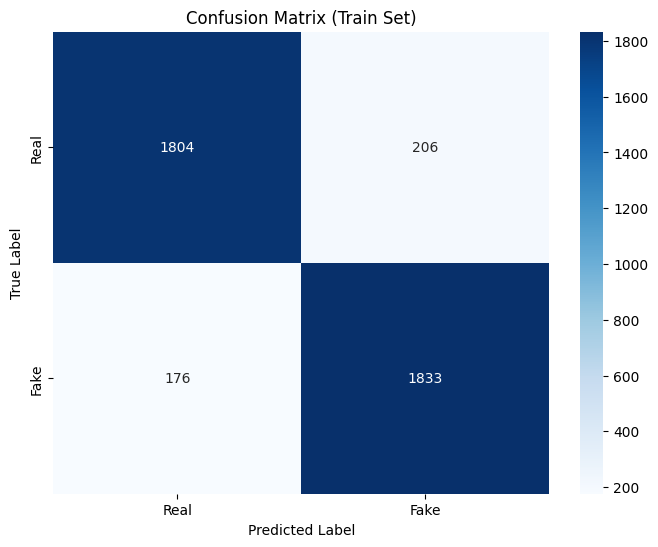

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.91      0.90      0.90      2010
        Fake       0.90      0.91      0.91      2009

    accuracy                           0.90      4019
   macro avg       0.91      0.90      0.90      4019
weighted avg       0.91      0.90      0.90      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 18, train loss: 0.2184391704028765, val loss: 0.8720230374019593, executed in: 1284.4079051017761
train total: 4019, train correct: 3637.0, train incorrect: 382.0, train accuracy: 0.9049514532089233
valid total: 1005, valid correct: 805.0, valid incorrect: 200.0, valid accuracy: 0.8009950518608093


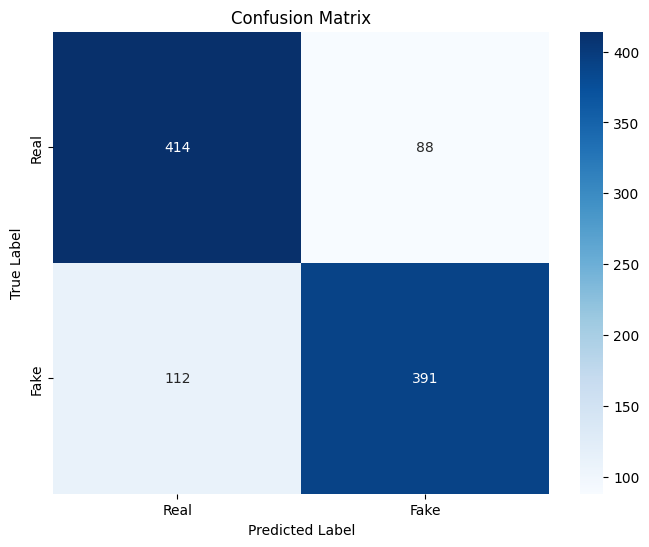

Classification Report:
              precision    recall  f1-score   support

        Real       0.79      0.82      0.81       502
        Fake       0.82      0.78      0.80       503

    accuracy                           0.80      1005
   macro avg       0.80      0.80      0.80      1005
weighted avg       0.80      0.80      0.80      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [16:58,  2.03s/it]


[[1812  198]
 [ 141 1868]]


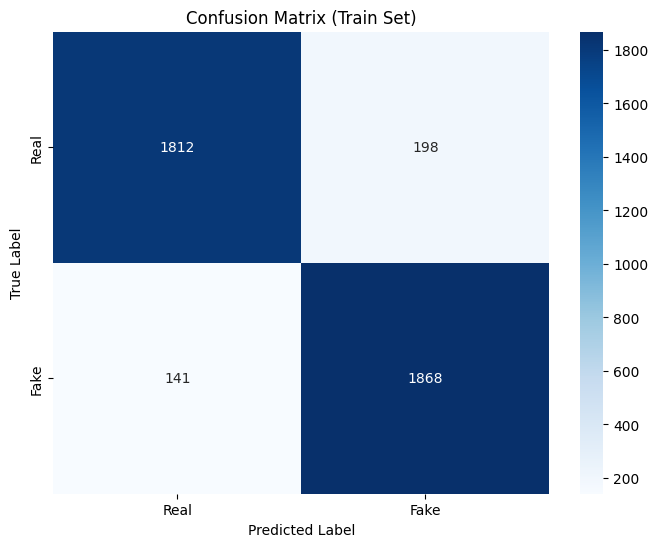

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.93      0.90      0.91      2010
        Fake       0.90      0.93      0.92      2009

    accuracy                           0.92      4019
   macro avg       0.92      0.92      0.92      4019
weighted avg       0.92      0.92      0.92      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 19, train loss: 0.20017541128684715, val loss: 0.7991129514070169, executed in: 1275.9745762348175
train total: 4019, train correct: 3680.0, train incorrect: 339.0, train accuracy: 0.9156506061553955
valid total: 1005, valid correct: 798.0, valid incorrect: 207.0, valid accuracy: 0.7940298914909363


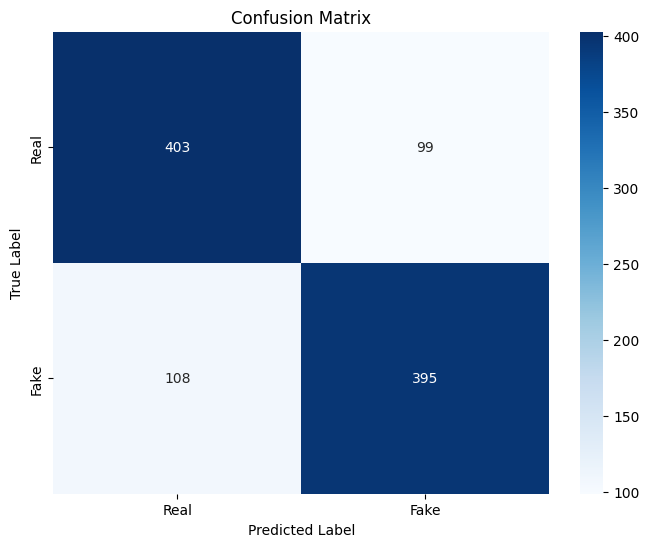

Classification Report:
              precision    recall  f1-score   support

        Real       0.79      0.80      0.80       502
        Fake       0.80      0.79      0.79       503

    accuracy                           0.79      1005
   macro avg       0.79      0.79      0.79      1005
weighted avg       0.79      0.79      0.79      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
407it [14:11,  1.92s/it]

In [ ]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import datetime
import sys
import pandas as pd
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import gc


train_folders = ['/content/dfdc']
test_folders = ['/content/test_videos']

batch_size = int(8)
num_epochs = int(5)
n_frames = int(10)
lr = float(0.001)

TRAIN_FOLDERS = train_folders
TEST_FOLDERS = test_folders
print(f"all train folders: {train_folders}, {type(train_folders)}")
print(f"all test folders: {test_folders}, {type(test_folders)}")

gamma = 0.1
milestones = [6,12,18]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = FaceClassifier()
model.load_state_dict(torch.load('/content/dfdc_5k_train_test_split_b0_17_classifier_10_small.pt', map_location=device))
model = model.to(device)
class_weights = {0: 0.6191950464396285, 1: 10.1230}
weights_tensor = torch.tensor([class_weights[0], 10.1230], dtype=torch.float32).to(device)

# Modify the loss function
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)

start_time = datetime.datetime.now()
print(f'start time: {str(start_time)}')
print(f'using device: {device}')

'''Splitting into Train and Validation'''
train_dataset = FaceDeepfakeDataset(TRAIN_FOLDERS,  n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")
test_dataset = FaceDeepfakeDatasetTest(TEST_FOLDERS, n_frames=n_frames, n_audio_reads=576, device=device,  cache_folder="face_encode_cache")

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
print(len(train_loader))


'''Train_Loop'''
train_losses = []
val_losses = []
best_loss = np.inf
train_accuracies = []
val_accuracies = []
epoch_times = []


for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    gc.collect()
    for i, batch in tqdm(enumerate(train_loader)):
        torch.cuda.empty_cache()
        gc.collect()
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)

        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()

        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()
        gc.collect()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Train Set)')
    plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Real', 'Fake']))

    all_labels = []
    all_preds = []

    model.eval()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            torch.cuda.empty_cache()
            gc.collect()
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)
            torch.cuda.empty_cache()
            gc.collect()

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch + 16}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Real', 'Fake']))

    scheduler.step()
    ### Saving model per best validation loss
    if best_loss > val_losses[-1]:
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 17}_classifier_{n_frames}_small.pt')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 17}_classifier_{n_frames}_small.pt')


end_time = datetime.datetime.now()
print(f"end time: {str(end_time)}")
exec_time = end_time - start_time
print(f"executed in: {str(exec_time)}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


all train folders: ['/content/dfdc'], <class 'list'>
all test folders: ['/content/test_videos'], <class 'list'>


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 209MB/s]
<ipython-input-22-8b92594be3da>:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses 

start time: 2024-11-12 12:59:58.781377
using device: cuda
503


/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

[[1837  173]
 [ 141 1868]]


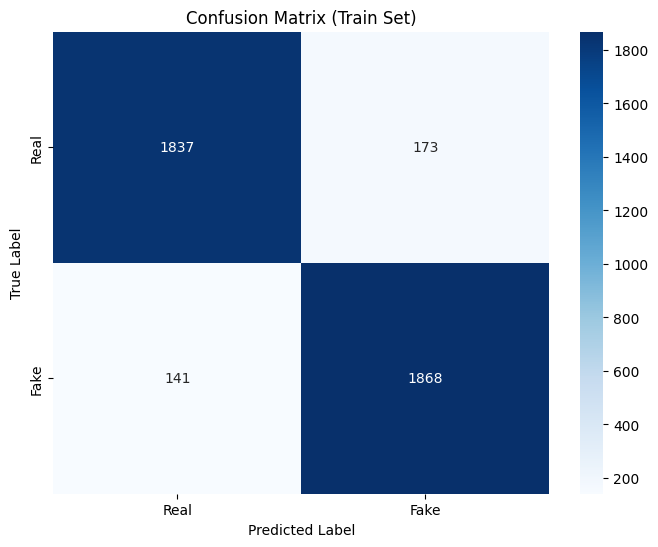

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.93      0.91      0.92      2010
        Fake       0.92      0.93      0.92      2009

    accuracy                           0.92      4019
   macro avg       0.92      0.92      0.92      4019
weighted avg       0.92      0.92      0.92      4019

..............................................................................................................................
epoch: 20, train loss: 0.1880498155599708, val loss: 0.7507068033862326, executed in: 7332.9478533267975
train total: 4019, train correct: 3705.0, train incorrect: 314.0, train accuracy: 0.9218710660934448
valid total: 1005, valid correct: 795.0, valid incorrect: 210.0, valid accuracy: 0.7910448312759399


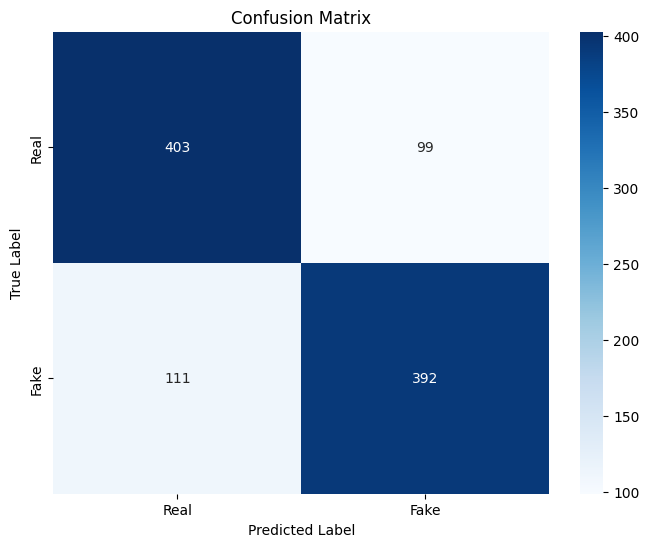

Classification Report:
              precision    recall  f1-score   support

        Real       0.78      0.80      0.79       502
        Fake       0.80      0.78      0.79       503

    accuracy                           0.79      1005
   macro avg       0.79      0.79      0.79      1005
weighted avg       0.79      0.79      0.79      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [17:32,  2.09s/it]


[[1825  185]
 [ 152 1857]]


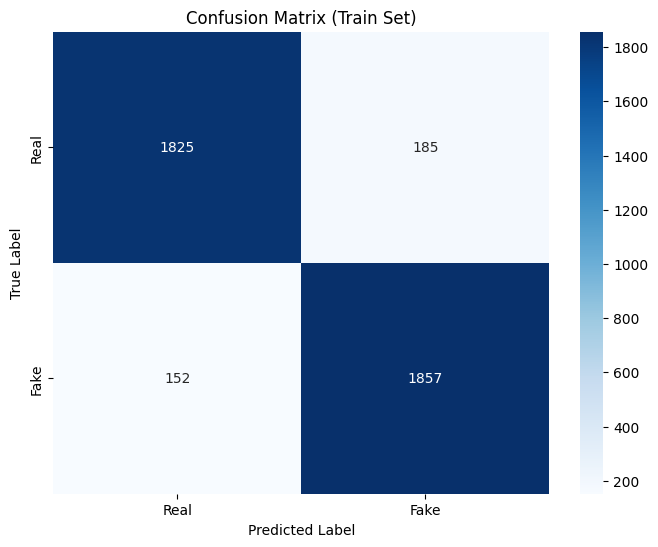

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.92      0.91      0.92      2010
        Fake       0.91      0.92      0.92      2009

    accuracy                           0.92      4019
   macro avg       0.92      0.92      0.92      4019
weighted avg       0.92      0.92      0.92      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 21, train loss: 0.19584084401660734, val loss: 0.7818090836535991, executed in: 1316.2254254817963
train total: 4019, train correct: 3682.0, train incorrect: 337.0, train accuracy: 0.9161482453346252
valid total: 1005, valid correct: 779.0, valid incorrect: 226.0, valid accuracy: 0.7751244306564331


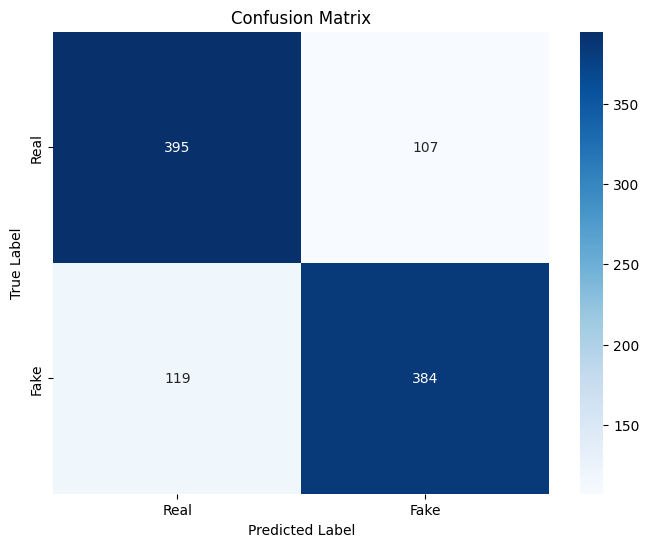

Classification Report:
              precision    recall  f1-score   support

        Real       0.77      0.79      0.78       502
        Fake       0.78      0.76      0.77       503

    accuracy                           0.78      1005
   macro avg       0.78      0.78      0.78      1005
weighted avg       0.78      0.78      0.78      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [17:21,  2.07s/it]


[[1836  174]
 [ 147 1862]]


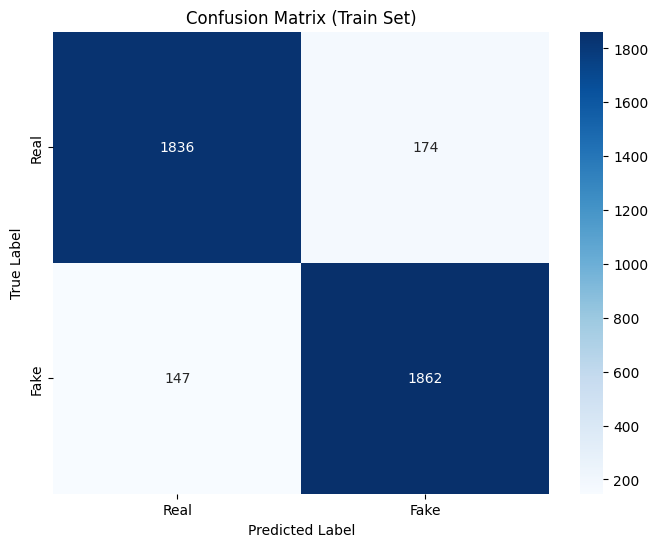

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.93      0.91      0.92      2010
        Fake       0.91      0.93      0.92      2009

    accuracy                           0.92      4019
   macro avg       0.92      0.92      0.92      4019
weighted avg       0.92      0.92      0.92      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 22, train loss: 0.1832410344894731, val loss: 0.7315098440333728, executed in: 1299.3751454353333
train total: 4019, train correct: 3698.0, train incorrect: 321.0, train accuracy: 0.9201293587684631
valid total: 1005, valid correct: 798.0, valid incorrect: 207.0, valid accuracy: 0.7940298914909363


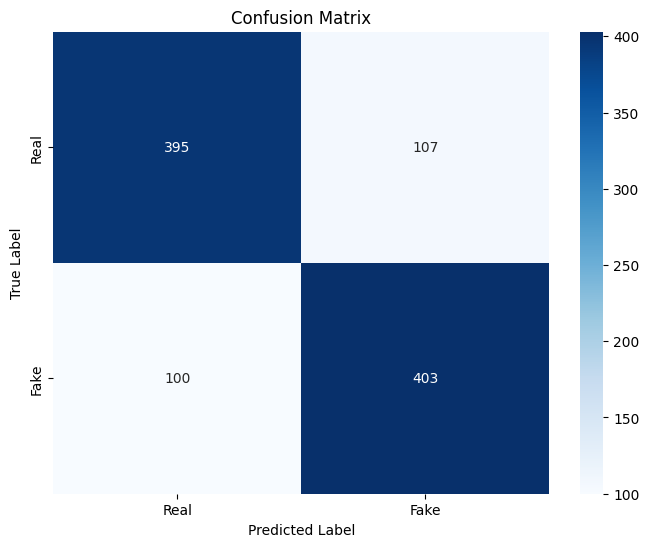

Classification Report:
              precision    recall  f1-score   support

        Real       0.80      0.79      0.79       502
        Fake       0.79      0.80      0.80       503

    accuracy                           0.79      1005
   macro avg       0.79      0.79      0.79      1005
weighted avg       0.79      0.79      0.79      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [17:27,  2.08s/it]


[[1845  165]
 [ 148 1861]]


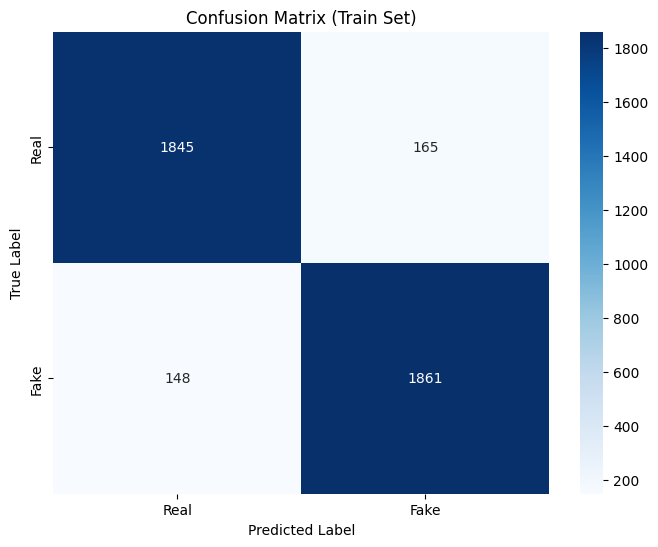

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.93      0.92      0.92      2010
        Fake       0.92      0.93      0.92      2009

    accuracy                           0.92      4019
   macro avg       0.92      0.92      0.92      4019
weighted avg       0.92      0.92      0.92      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 23, train loss: 0.18573359204511755, val loss: 0.741460292053128, executed in: 1313.188892841339
train total: 4019, train correct: 3706.0, train incorrect: 313.0, train accuracy: 0.9221199154853821
valid total: 1005, valid correct: 786.0, valid incorrect: 219.0, valid accuracy: 0.7820895910263062


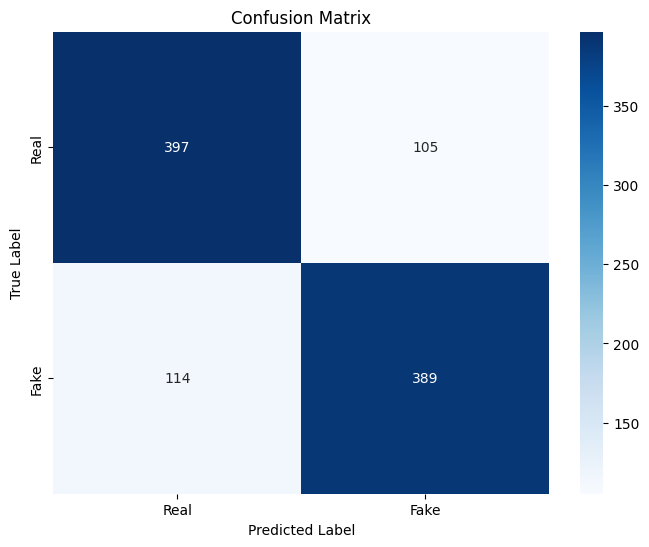

Classification Report:
              precision    recall  f1-score   support

        Real       0.78      0.79      0.78       502
        Fake       0.79      0.77      0.78       503

    accuracy                           0.78      1005
   macro avg       0.78      0.78      0.78      1005
weighted avg       0.78      0.78      0.78      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
499it [17:18,  1.90s/it]

In [ ]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import datetime
import sys
import pandas as pd
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import gc


train_folders = ['/content/dfdc']
test_folders = ['/content/test_videos']

batch_size = int(8)
num_epochs = int(5)
n_frames = int(10)
lr = float(0.001)

TRAIN_FOLDERS = train_folders
TEST_FOLDERS = test_folders
print(f"all train folders: {train_folders}, {type(train_folders)}")
print(f"all test folders: {test_folders}, {type(test_folders)}")

gamma = 0.1
milestones = [6,12,18]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = FaceClassifier()
model.load_state_dict(torch.load('/content/dfdc_5k_train_test_split_b0_20_classifier_10_small.pt', map_location=device))
model = model.to(device)
class_weights = {0: 0.6191950464396285, 1: 10.1230}
weights_tensor = torch.tensor([class_weights[0], 10.1230], dtype=torch.float32).to(device)

# Modify the loss function
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)

start_time = datetime.datetime.now()
print(f'start time: {str(start_time)}')
print(f'using device: {device}')

'''Splitting into Train and Validation'''
train_dataset = FaceDeepfakeDataset(TRAIN_FOLDERS,  n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")
test_dataset = FaceDeepfakeDatasetTest(TEST_FOLDERS, n_frames=n_frames, n_audio_reads=576, device=device,  cache_folder="face_encode_cache")

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
print(len(train_loader))


'''Train_Loop'''
train_losses = []
val_losses = []
best_loss = np.inf
train_accuracies = []
val_accuracies = []
epoch_times = []


for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    gc.collect()
    for i, batch in tqdm(enumerate(train_loader)):
        torch.cuda.empty_cache()
        gc.collect()
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)

        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()

        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()
        gc.collect()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Train Set)')
    plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Real', 'Fake']))

    all_labels = []
    all_preds = []

    model.eval()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            torch.cuda.empty_cache()
            gc.collect()
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)
            torch.cuda.empty_cache()
            gc.collect()

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch + 20}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Real', 'Fake']))

    scheduler.step()
    ### Saving model per best validation loss
    if best_loss > val_losses[-1]:
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 21}_classifier_{n_frames}_small.pt')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 21}_classifier_{n_frames}_small.pt')


end_time = datetime.datetime.now()
print(f"end time: {str(end_time)}")
exec_time = end_time - start_time
print(f"executed in: {str(exec_time)}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


all train folders: ['/content/dfdc'], <class 'list'>
all test folders: ['/content/test_videos'], <class 'list'>


<ipython-input-23-6a308cae7b59>:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/dfdc_5k_train_test_split_b0_24_classifier_10_sma

start time: 2024-11-12 17:19:31.331284
using device: cuda
503


2it [00:29, 14.13s/it]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [1:43:58, 12.40s/it]


[[1848  162]
 [ 132 1877]]


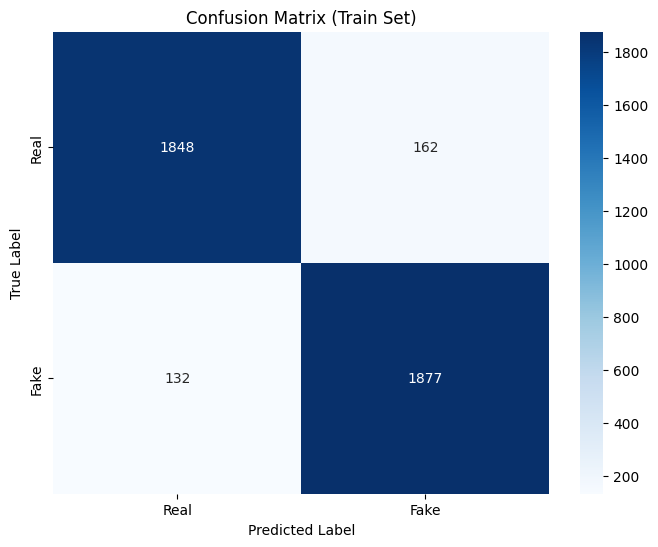

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.93      0.92      0.93      2010
        Fake       0.92      0.93      0.93      2009

    accuracy                           0.93      4019
   macro avg       0.93      0.93      0.93      4019
weighted avg       0.93      0.93      0.93      4019

..............................................................................................................................
epoch: 24, train loss: 0.17714137500142735, val loss: 0.7071596160771266, executed in: 7558.56164598465
train total: 4019, train correct: 3725.0, train incorrect: 294.0, train accuracy: 0.9268474578857422
valid total: 1005, valid correct: 775.0, valid incorrect: 230.0, valid accuracy: 0.7711443305015564


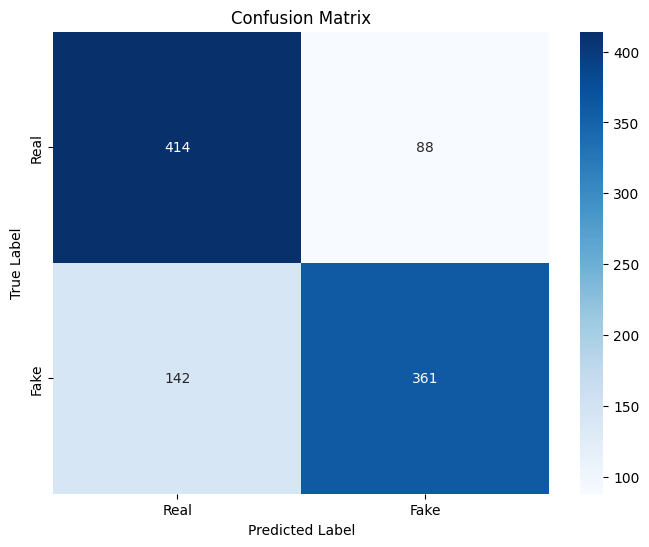

Classification Report:
              precision    recall  f1-score   support

        Real       0.74      0.82      0.78       502
        Fake       0.80      0.72      0.76       503

    accuracy                           0.77      1005
   macro avg       0.77      0.77      0.77      1005
weighted avg       0.77      0.77      0.77      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [17:25,  2.08s/it]


[[1869  141]
 [ 120 1889]]


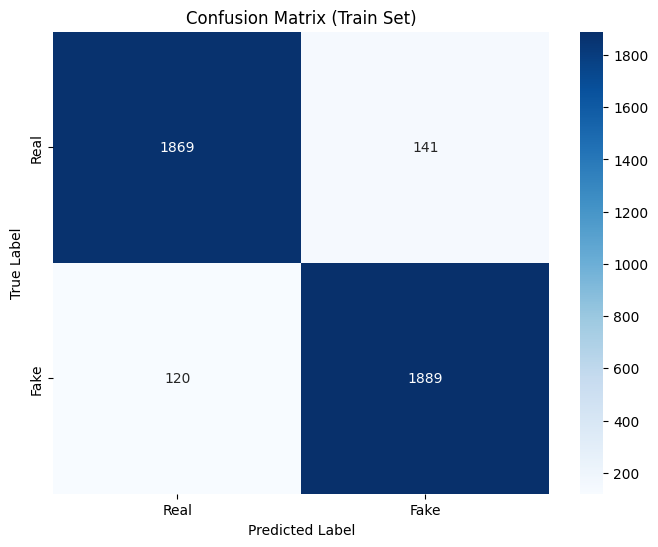

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.94      0.93      0.93      2010
        Fake       0.93      0.94      0.94      2009

    accuracy                           0.94      4019
   macro avg       0.94      0.94      0.94      4019
weighted avg       0.94      0.94      0.94      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 25, train loss: 0.15982450497527395, val loss: 0.638029571448911, executed in: 1307.9060049057007
train total: 4019, train correct: 3758.0, train incorrect: 261.0, train accuracy: 0.9350584149360657
valid total: 1005, valid correct: 771.0, valid incorrect: 234.0, valid accuracy: 0.7671642303466797


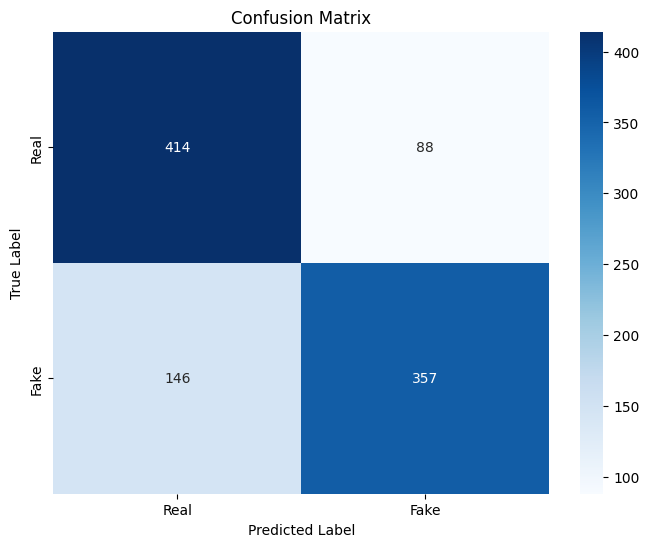

Classification Report:
              precision    recall  f1-score   support

        Real       0.74      0.82      0.78       502
        Fake       0.80      0.71      0.75       503

    accuracy                           0.77      1005
   macro avg       0.77      0.77      0.77      1005
weighted avg       0.77      0.77      0.77      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [17:27,  2.08s/it]


[[1865  145]
 [ 121 1888]]


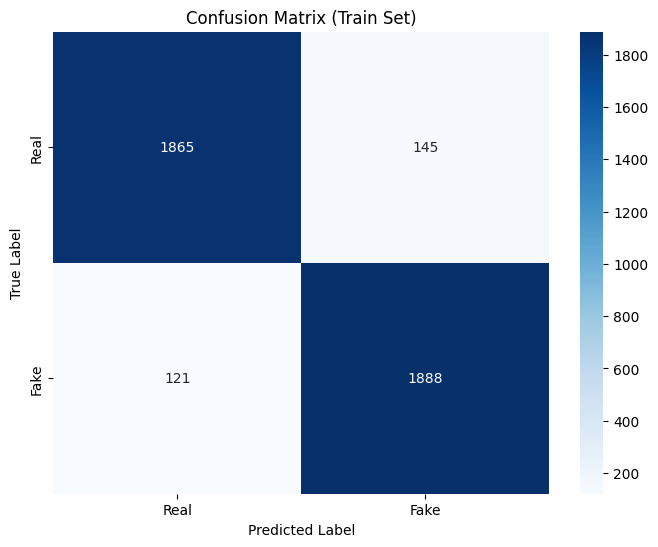

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.94      0.93      0.93      2010
        Fake       0.93      0.94      0.93      2009

    accuracy                           0.93      4019
   macro avg       0.93      0.93      0.93      4019
weighted avg       0.93      0.93      0.93      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 26, train loss: 0.16795035603846872, val loss: 0.6704684848202362, executed in: 1305.5610754489899
train total: 4019, train correct: 3753.0, train incorrect: 266.0, train accuracy: 0.9338143467903137
valid total: 1005, valid correct: 791.0, valid incorrect: 214.0, valid accuracy: 0.7870647311210632


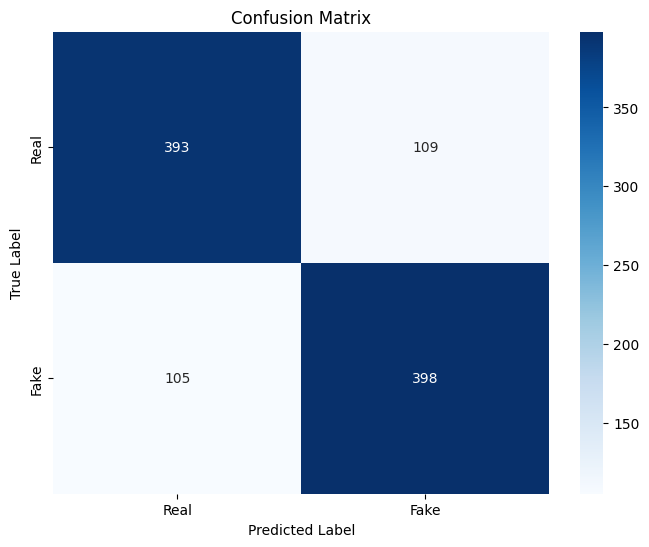

Classification Report:
              precision    recall  f1-score   support

        Real       0.79      0.78      0.79       502
        Fake       0.79      0.79      0.79       503

    accuracy                           0.79      1005
   macro avg       0.79      0.79      0.79      1005
weighted avg       0.79      0.79      0.79      1005



0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [17:32,  2.09s/it]


[[1849  161]
 [ 122 1887]]


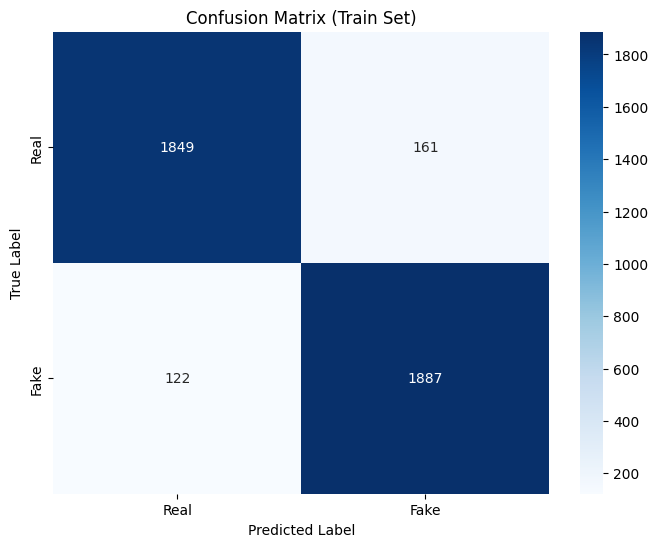

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.94      0.92      0.93      2010
        Fake       0.92      0.94      0.93      2009

    accuracy                           0.93      4019
   macro avg       0.93      0.93      0.93      4019
weighted avg       0.93      0.93      0.93      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 27, train loss: 0.17367129123429018, val loss: 0.6933068213559362, executed in: 1320.037852048874
train total: 4019, train correct: 3736.0, train incorrect: 283.0, train accuracy: 0.9295844435691833
valid total: 1005, valid correct: 785.0, valid incorrect: 220.0, valid accuracy: 0.7810945510864258


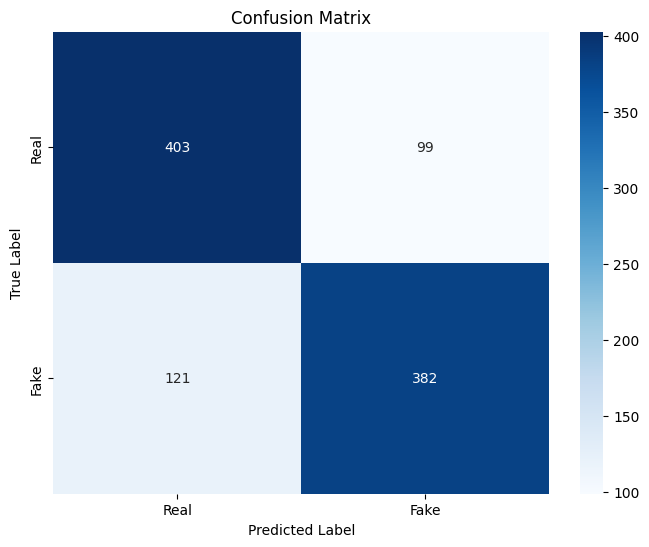

Classification Report:
              precision    recall  f1-score   support

        Real       0.77      0.80      0.79       502
        Fake       0.79      0.76      0.78       503

    accuracy                           0.78      1005
   macro avg       0.78      0.78      0.78      1005
weighted avg       0.78      0.78      0.78      1005

end time: 2024-11-12 20:31:05.709656
executed in: 3:11:34.378372
Tesla T4
Memory Usage:
Allocated: 0.1 GB
Cached:    0.2 GB


<ipython-input-23-6a308cae7b59>:218: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


In [23]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import datetime
import sys
import pandas as pd
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import gc


train_folders = ['/content/dfdc']
test_folders = ['/content/test_videos']

batch_size = int(8)
num_epochs = int(4)
n_frames = int(10)
lr = float(0.001)

TRAIN_FOLDERS = train_folders
TEST_FOLDERS = test_folders
print(f"all train folders: {train_folders}, {type(train_folders)}")
print(f"all test folders: {test_folders}, {type(test_folders)}")

gamma = 0.1
milestones = [6,12,18]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = FaceClassifier()
model.load_state_dict(torch.load('/content/dfdc_5k_train_test_split_b0_24_classifier_10_small.pt', map_location=device))
model = model.to(device)
class_weights = {0: 0.6191950464396285, 1: 10.1230}
weights_tensor = torch.tensor([class_weights[0], 10.1230], dtype=torch.float32).to(device)

# Modify the loss function
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)

start_time = datetime.datetime.now()
print(f'start time: {str(start_time)}')
print(f'using device: {device}')

'''Splitting into Train and Validation'''
train_dataset = FaceDeepfakeDataset(TRAIN_FOLDERS,  n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")
test_dataset = FaceDeepfakeDatasetTest(TEST_FOLDERS, n_frames=n_frames, n_audio_reads=576, device=device,  cache_folder="face_encode_cache")

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
print(len(train_loader))


'''Train_Loop'''
train_losses = []
val_losses = []
best_loss = np.inf
train_accuracies = []
val_accuracies = []
epoch_times = []


for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    gc.collect()
    for i, batch in tqdm(enumerate(train_loader)):
        torch.cuda.empty_cache()
        gc.collect()
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)

        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()

        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()
        gc.collect()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Train Set)')
    plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Real', 'Fake']))

    all_labels = []
    all_preds = []

    model.eval()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            torch.cuda.empty_cache()
            gc.collect()
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)
            torch.cuda.empty_cache()
            gc.collect()

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch + 24}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Real', 'Fake']))

    scheduler.step()
    ### Saving model per best validation loss
    if best_loss > val_losses[-1]:
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 25}_classifier_{n_frames}_small.pt')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 25}_classifier_{n_frames}_small.pt')


end_time = datetime.datetime.now()
print(f"end time: {str(end_time)}")
exec_time = end_time - start_time
print(f"executed in: {str(exec_time)}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


0it [00:00, ?it/s]<ipython-input-17-0d3d7818da70>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
503it [17:41,  2.11s/it]


[[1871  139]
 [ 116 1893]]


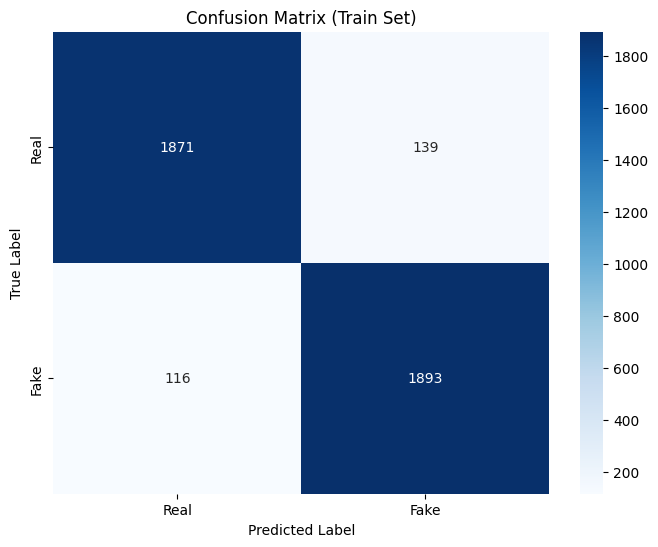

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.94      0.93      0.94      2010
        Fake       0.93      0.94      0.94      2009

    accuracy                           0.94      4019
   macro avg       0.94      0.94      0.94      4019
weighted avg       0.94      0.94      0.94      4019



<ipython-input-19-0ee26e648c0f>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)


..............................................................................................................................
epoch: 28, train loss: 0.15364820341196347, val loss: 0.6133733834620447, executed in: 1325.8014492988586
train total: 4019, train correct: 3764.0, train incorrect: 255.0, train accuracy: 0.9365513324737549
valid total: 1005, valid correct: 768.0, valid incorrect: 237.0, valid accuracy: 0.7641791105270386


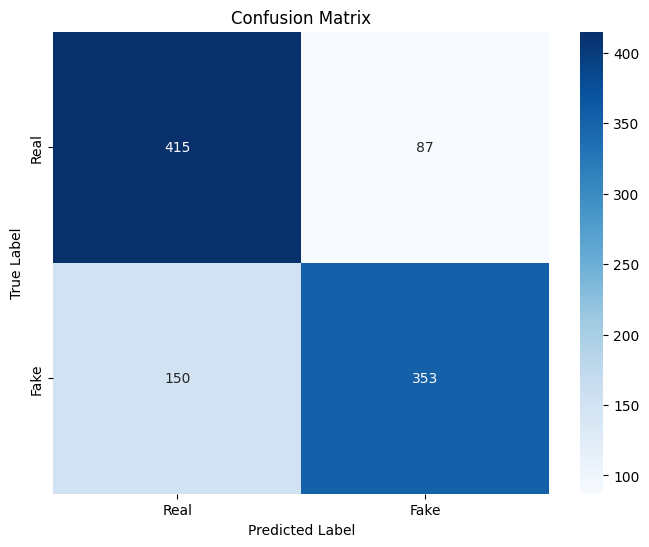

Classification Report:
              precision    recall  f1-score   support

        Real       0.73      0.83      0.78       502
        Fake       0.80      0.70      0.75       503

    accuracy                           0.76      1005
   macro avg       0.77      0.76      0.76      1005
weighted avg       0.77      0.76      0.76      1005

Tesla T4
Memory Usage:
Allocated: 0.2 GB
Cached:    0.3 GB


<ipython-input-25-1aa340c40fa0>:144: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


In [25]:
for epoch in range(1):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    gc.collect()
    for i, batch in tqdm(enumerate(train_loader)):
        torch.cuda.empty_cache()
        gc.collect()
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)

        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()

        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()
        gc.collect()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Train Set)')
    plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Real', 'Fake']))

    all_labels = []
    all_preds = []

    model.eval()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            torch.cuda.empty_cache()
            gc.collect()
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)
            torch.cuda.empty_cache()
            gc.collect()

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch + 28}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Real', 'Fake']))

    scheduler.step()
    ### Saving model per best validation loss
    if best_loss > val_losses[-1]:
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 29}_classifier_{n_frames}_small.pt')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_5k_train_test_split_b0_{epoch + 29}_classifier_{n_frames}_small.pt')

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')